In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
#from lwautils import lwa_arx 
import pandas as pd
from cr_data_inspection_functions import *
import struct
import math
from lwa_antpos import mapping
import os

dsautils.cnf not found. skipping...
Read antpos from etcd


In [2]:
fname='/home/ubuntu/kp/data/2023April4/packetwait60001680654937.4761376.dat'
fname='/home/ubuntu/kp/data/2023April4/packetwait6000_triggersnap041680656108.0096362.dat'
fname='/home/ubuntu/kp/data/2023April5/file5events1680708308.1066167.dat' #five "events" (triggers from software) in one file
fname='/home/ubuntu/kp/data/2023April5/file5events_aftersync1680727473.3673108.dat' #trying again after redoing synchronization and setup
fname='/home/ubuntu/kp/data/2023April6/test5events1680827775.852633.dat'  #new firmware
fname='/home/ubuntu/kp/data/2023April16/test_new_firmware_for_timestamp_fix_packetwait60001681693266.5600955.dat'
records=parsefile(fname)

File contains  3520  packets


In [3]:
packetboardids=[record['board_id'] for record in records]
timestamps=[record['timestamp'] for record in records]

In [4]:
def fraction_odd(timestamps_to_check):
    #This function returns the fraction of values in a given list or 1D array that are odd
    #It is a way to check whether the full precision has been maintained
    total=len(timestamps_to_check)
    count_odd=0
    for t in range(total):
        if t%2:
            count_odd+=1
    return count_odd/total
print(fraction_odd( timestamps))

0.5


In [5]:
for i in range(11):
    count=0
    for b in packetboardids:
        if i+1==b:
            count+=1
    print('Got ',count,' packets from snap',i+1)

Got  320  packets from snap 1
Got  320  packets from snap 2
Got  320  packets from snap 3
Got  320  packets from snap 4
Got  320  packets from snap 5
Got  320  packets from snap 6
Got  320  packets from snap 7
Got  320  packets from snap 8
Got  320  packets from snap 9
Got  320  packets from snap 10
Got  320  packets from snap 11


In [6]:
64*5

320

0.5


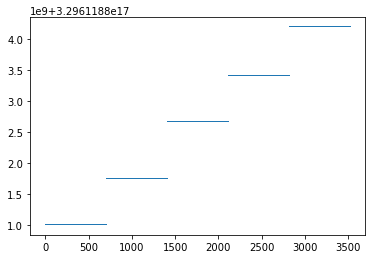

In [7]:
plt.plot(timestamps,',')
#plt.ylim(3.2942e17,3.2943e17)
print(fraction_odd( timestamps))

0.5
329611884197915629 3200603179
0.5
329611884197915641 3200603179
0.5
329611884197915653 3200603179
0.5
329611884197915529 3200603179
0.5
329611884197915542 3200603179
0.5
329611884197915554 3200603179
0.5
329611884197915616 3200603179
0.5
329611884197915604 3200603179
0.5
329611884197915592 3200603179
0.5
329611884197915580 3200603179
0.5
329611884197915567 3200603179


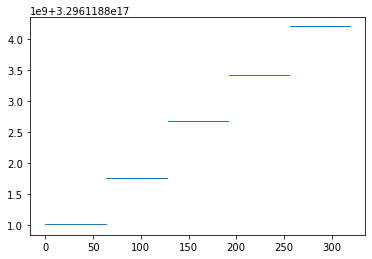

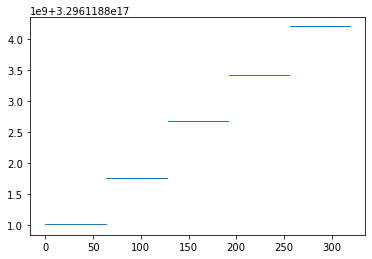

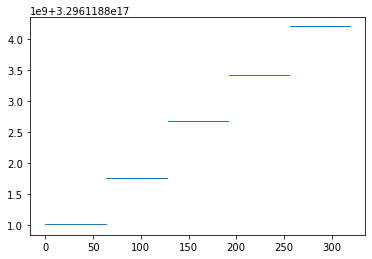

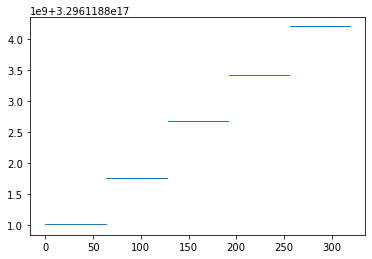

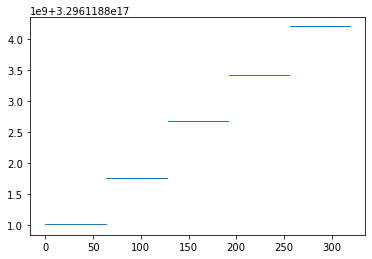

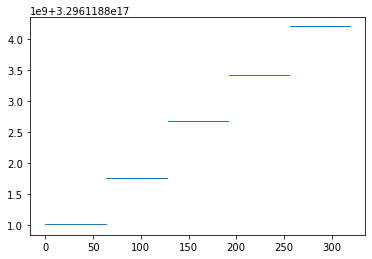

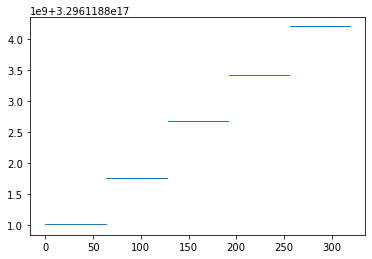

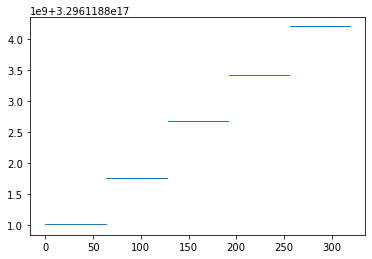

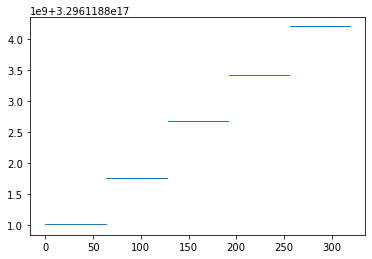

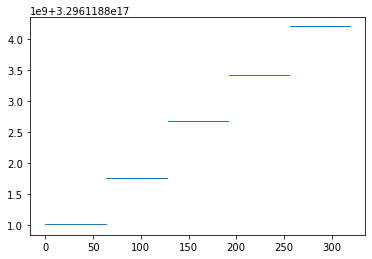

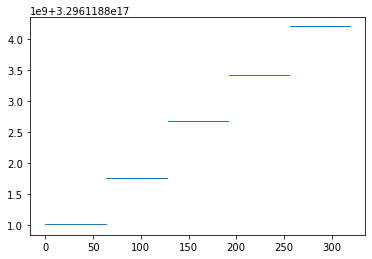

In [8]:
timestamps1=[record['timestamp'] for record in records if record['board_id']==1]
timestamps2=[record['timestamp'] for record in records if record['board_id']==2]
timestamps3=[record['timestamp'] for record in records if record['board_id']==3]
timestamps4=[record['timestamp'] for record in records if record['board_id']==4]
timestamps5=[record['timestamp'] for record in records if record['board_id']==5]
timestamps6=[record['timestamp'] for record in records if record['board_id']==6]
timestamps7=[record['timestamp'] for record in records if record['board_id']==7]
timestamps8=[record['timestamp'] for record in records if record['board_id']==8]
timestamps9=[record['timestamp'] for record in records if record['board_id']==9]
timestamps10=[record['timestamp'] for record in records if record['board_id']==10]
timestamps11=[record['timestamp'] for record in records if record['board_id']==11]
separatetimestampsbyboard=[timestamps1,timestamps2,timestamps3,timestamps4,timestamps5,timestamps6,timestamps7,timestamps8,timestamps9,timestamps10,timestamps11]
for singleboardtimestamps in separatetimestampsbyboard:
    print(fraction_odd( singleboardtimestamps))
    print(np.max(np.asarray(singleboardtimestamps)),np.max(np.asarray(singleboardtimestamps))-np.min(np.asarray(singleboardtimestamps)))

    plt.figure()
    plt.plot(singleboardtimestamps,',')
    


0.5
0.5
0.5
0.5
0.5


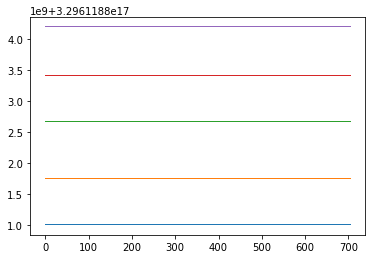

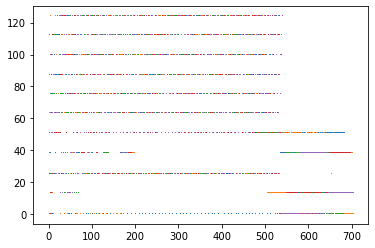

In [9]:
event1=records[0:704]
event2=records[704:704*2]
event3=records[704*2:704*3]
event4=records[704*3:704*4]
event5=records[704*4:704*5]
events=[event1,event2,event3,event4,event5]
for e in events:
    eventtimestamps=np.asarray([record['timestamp'] for record in e],dtype='Q')
    plt.plot(eventtimestamps,',')
    print(fraction_odd( eventtimestamps))

plt.figure()
for e in events:
    eventtimestamps=np.asarray([record['timestamp'] for record in e],dtype='Q')
    plt.plot(eventtimestamps-np.min(eventtimestamps),',')

Below, check that timestamps are the same within each board and event and then save an array with one timestamp per board and event.

In [10]:

timestamp_by_board_and_event=np.zeros((11,5),dtype='Q')
for i,e in enumerate(events):
    for b in range(11):
        singleboard=np.asarray([record['timestamp'] for record in e if record['board_id']==b+1],dtype='Q')
        minimum=np.min(singleboard)
        maximum=np.max(singleboard)
        if minimum!=maximum: #within each board and event, are all the timestamps the same?  YES
            print(b,minimum,maximum)
        timestamp_by_board_and_event[b,i]=minimum
    print(fraction_odd(timestamp_by_board_and_event[:,i]))


0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45454545454545453


0.45454545454545453
0.45454545454545453
earliest 329611880997312350
[100 112 124   0  13  25  87  75  63  51  38]
0.45454545454545453
0.45454545454545453
earliest 329611881739445324
[100 112 124   0  13  25  87  75  63  51  38]
0.45454545454545453
0.45454545454545453
earliest 329611882665061762
[100 112 124   0  13  25  87  75  63  51  38]
0.45454545454545453
0.45454545454545453
earliest 329611883401932734
[100 112 124   0  13  25  87  75  63  51  38]
0.45454545454545453
0.45454545454545453
earliest 329611884197915529
[100 112 124   0  13  25  87  75  63  51  38]


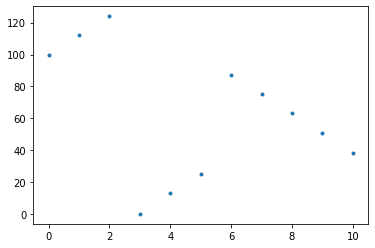

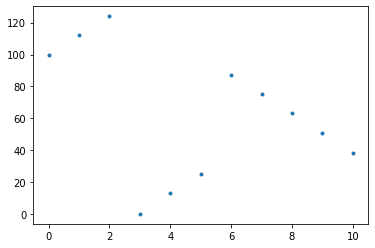

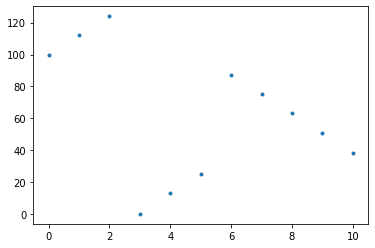

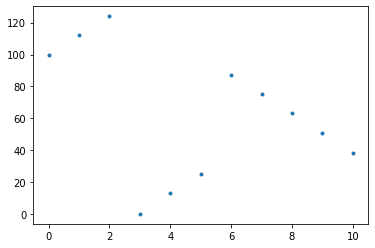

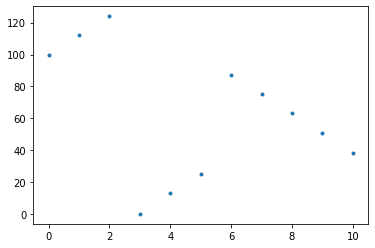

In [11]:
for e in range(5):
    thisevent=timestamp_by_board_and_event[:,e]
    print(fraction_odd( thisevent))

    earliest=np.min(thisevent)
    earliest_subtracted=thisevent-earliest
    print(fraction_odd( earliest_subtracted))

    print("earliest",earliest)
    plt.figure()
    plt.plot(earliest_subtracted,'.')
    print(earliest_subtracted)


## Summary
For each event, the difference in timestamps between boards is small, and the offset between boards is nearly the same for all events (which is expected because snap03 is always the first to receive the trigger signal).

Check that the value of the timestamp is reasonable.

In [13]:
timestamp=timestamps[0]
samplespersecond=1.96e8
unixtime=timestamp/(samplespersecond)
print(unixtime)

1681693270.394451


In [14]:
print(timestamp_by_board_and_event/samplespersecond)

[[1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]
 [1.68169327e+09 1.68169327e+09 1.68169328e+09 1.68169328e+09
  1.68169329e+09]]


## Function for sorting packets into events

    

In [57]:

def distinguishevents(records,maxoffset):
    #This function turns a list of single-antenna records, into a list of events.
    #records is a list of single-antenna records, such as that returned by parsefile.
    #maxoffset is the maximum timestamp difference (in number of clockcycles) for two records to be considered part of the same event.
    #The function distinguish events returns a list of events, where each event is a list of the records (single-antenna dictionaries) that belong to that event.

    #start an empty list which will ultimately have one element per event
    events=[]
    eventcount=1  #keep track of how many separate events there are

    #start an list for the first event. The first record is the first element of the first event
    currentevent=[records[0]]
    currenteventtimestamp=records[0]['timestamp']

    maxtimestamp=currenteventtimestamp+maxoffset #all 
    for record in records:
        recordtimestamp=record['timestamp']
        if recordtimestamp<maxtimestamp:
            #print(recordtimestamp, maxtimestamp,True)
            currentevent.append(record)
        else: #start a new event
            #print(recordtimestamp, maxtimestamp,False)
            eventcount+=1
            events.append(currentevent)
            currentevent=[record]
            currenteventtimestamp=record['timestamp']
            maxtimestamp=currenteventtimestamp+maxoffset
    events.append(currentevent)
    return events
        

In [58]:
maxoffset=200 #maximum number of clock cycles difference allowed between packets that are part of the same event
records=parsefile(fname)
events=distinguishevents(records,maxoffset)

File contains  3520  packets


In [52]:
print(len(events))
print(eventcount)

5
5


In [59]:
#separate event records by board
#for each board, plot the timeseries in an 8x8 grid
#label the plots by antenna name
#add an option to instead plot histogram or power spectrum

In [80]:
def plot_all_timeseries(event):
    for b in range(11):
        singleboard=[record for record in event if record['board_id']==b+1]
        fig=plt.figure(figsize=(20,15))
        plt.suptitle("Board "+str(b+1)+" timestamp "+str(singleboard[0]['timestamp']))
        for i in range(64):
            ax=fig.add_subplot(8,8,1+i)
            if i<len(singleboard):
                record=singleboard[i]
                antenna=packet_ant_id_2_snap_input(record['antenna_id']) #Get the snap2 input number
                antname=mapping.snap2_to_antpol(b+1,antenna) #TODO zero index the boards or 1-index??

                timeseries=record['data']
                plt.plot(timeseries)
                ax.text(.5,.5,antname,horizontalalignment='center',transform=ax.transAxes)
            if i > 55:
                plt.xlabel('time sample')
            if i%8==0:
                plt.ylabel('voltage [ADC units]')
    return

def plot_all_spectra(event):

    for b in range(11):
        singleboard=[record for record in event if record['board_id']==b+1]
        fig=plt.figure(figsize=(20,15))
        plt.suptitle("Board "+str(b+1)+" timestamp "+str(singleboard[0]['timestamp']))
        for i in range(64):
            ax=fig.add_subplot(8,8,1+i)
            if i<len(singleboard):
                record=singleboard[i]
                antenna=packet_ant_id_2_snap_input(record['antenna_id']) #Get the snap2 input number
                antname=mapping.snap2_to_antpol(b+1,antenna) #TODO zero index the boards or 1-index??
                timeseries=record['data']
                spec=np.fft.rfft(timeseries)
                plt.plot(np.log(np.square(np.abs(spec))))
                ax.text(.5,.5,antname,horizontalalignment='center',transform=ax.transAxes)
            if i > 55:
                plt.xlabel('frequency channel')
            if i%8==0:
                plt.ylabel('power')
    return

def plot_all_histograms(event):
    for b in range(11):
        singleboard=[record for record in event if record['board_id']==b+1]
        fig=plt.figure(figsize=(20,15))
        plt.suptitle("Board "+str(b+1)+" timestamp "+str(singleboard[0]['timestamp']))
        for i in range(64):
            ax=fig.add_subplot(8,8,1+i)
            if i<len(singleboard):
                record=singleboard[i]
                antenna=packet_ant_id_2_snap_input(record['antenna_id']) #Get the snap2 input number
                antname=mapping.snap2_to_antpol(b+1,antenna) #TODO zero index the boards or 1-index??

                timeseries=record['data']
                plt.hist(timeseries)
                ax.text(.5,.5,antname,horizontalalignment='center',transform=ax.transAxes)

            if i > 55:
                plt.xlabel('Voltage [ADC units]')
            if i%8==0:
                plt.ylabel('Counts')
    return

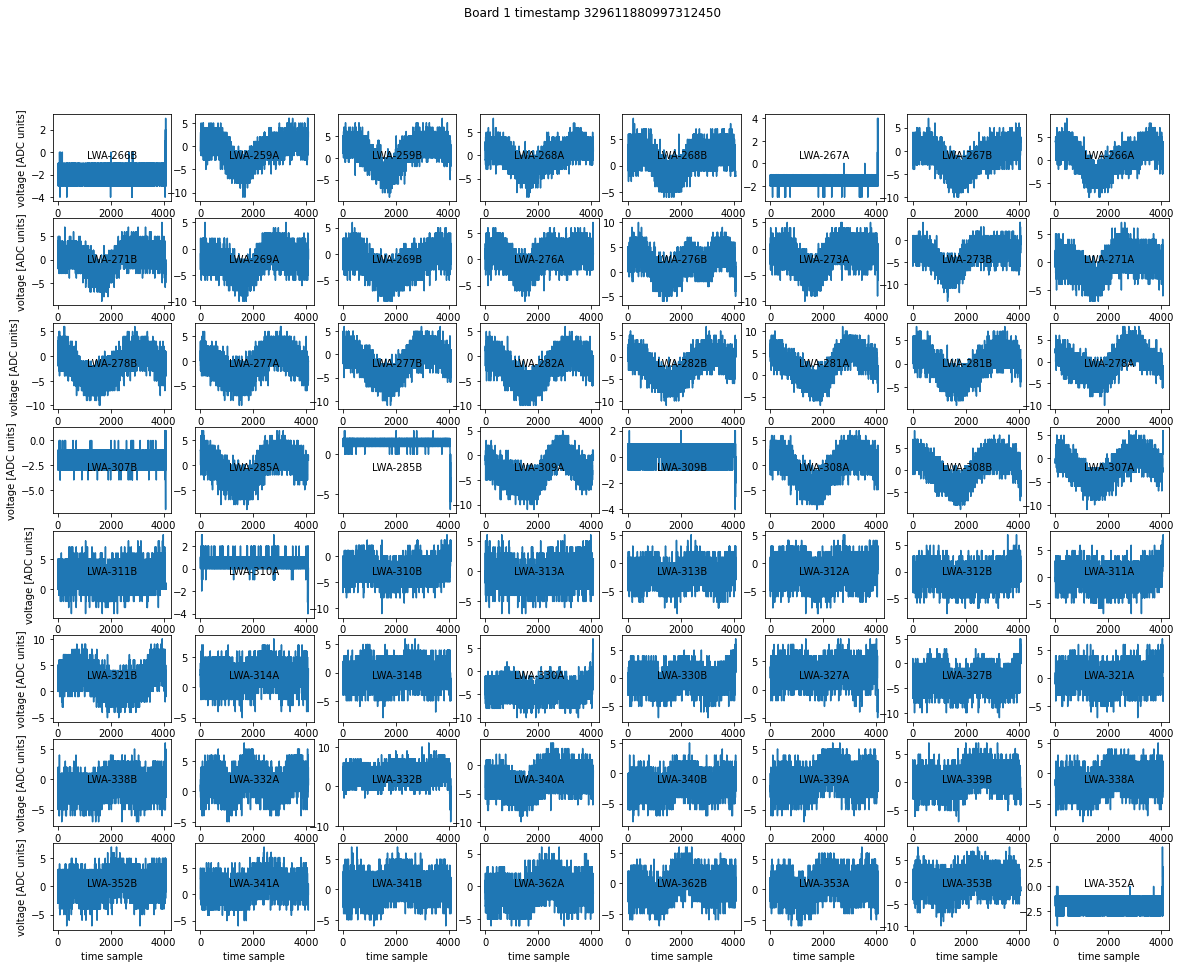

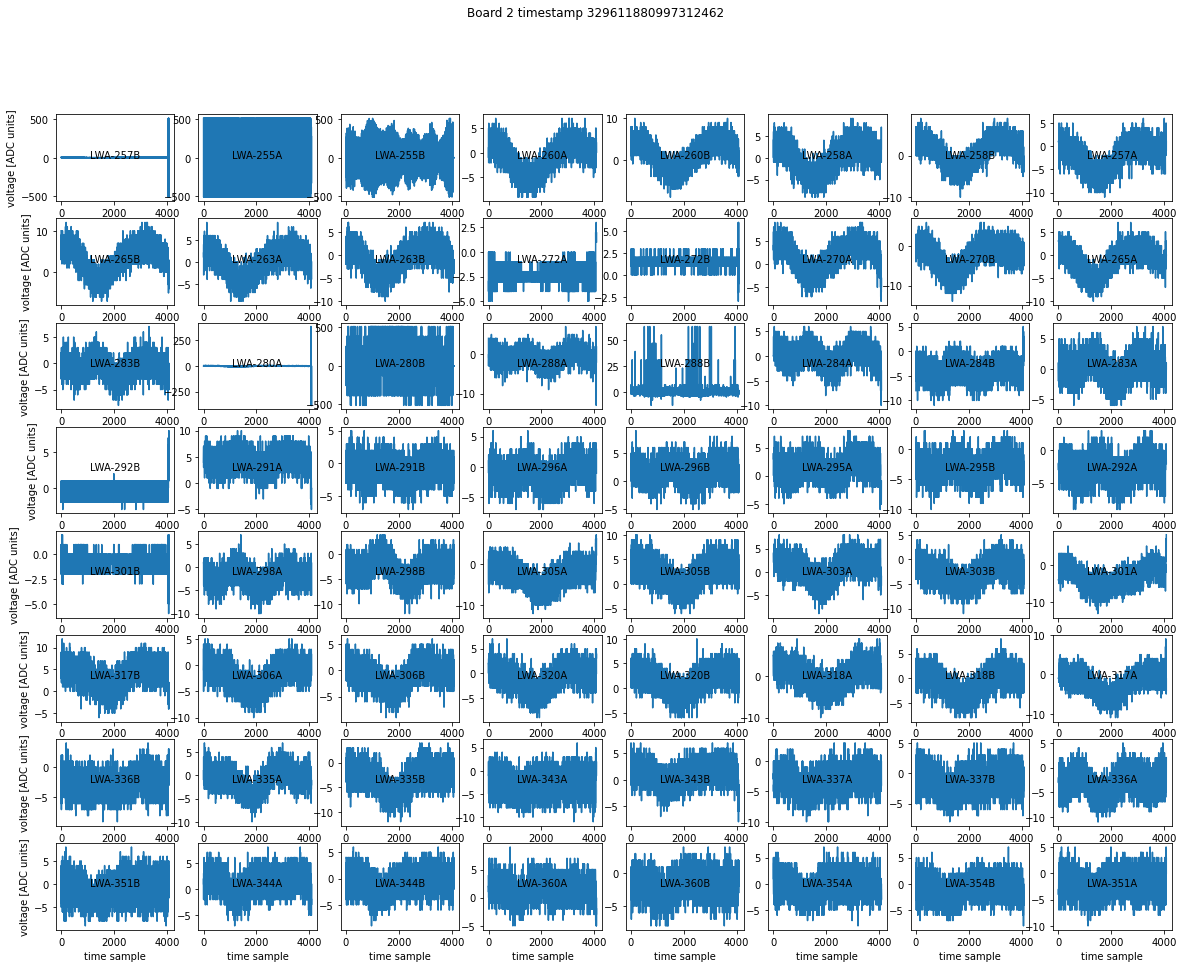

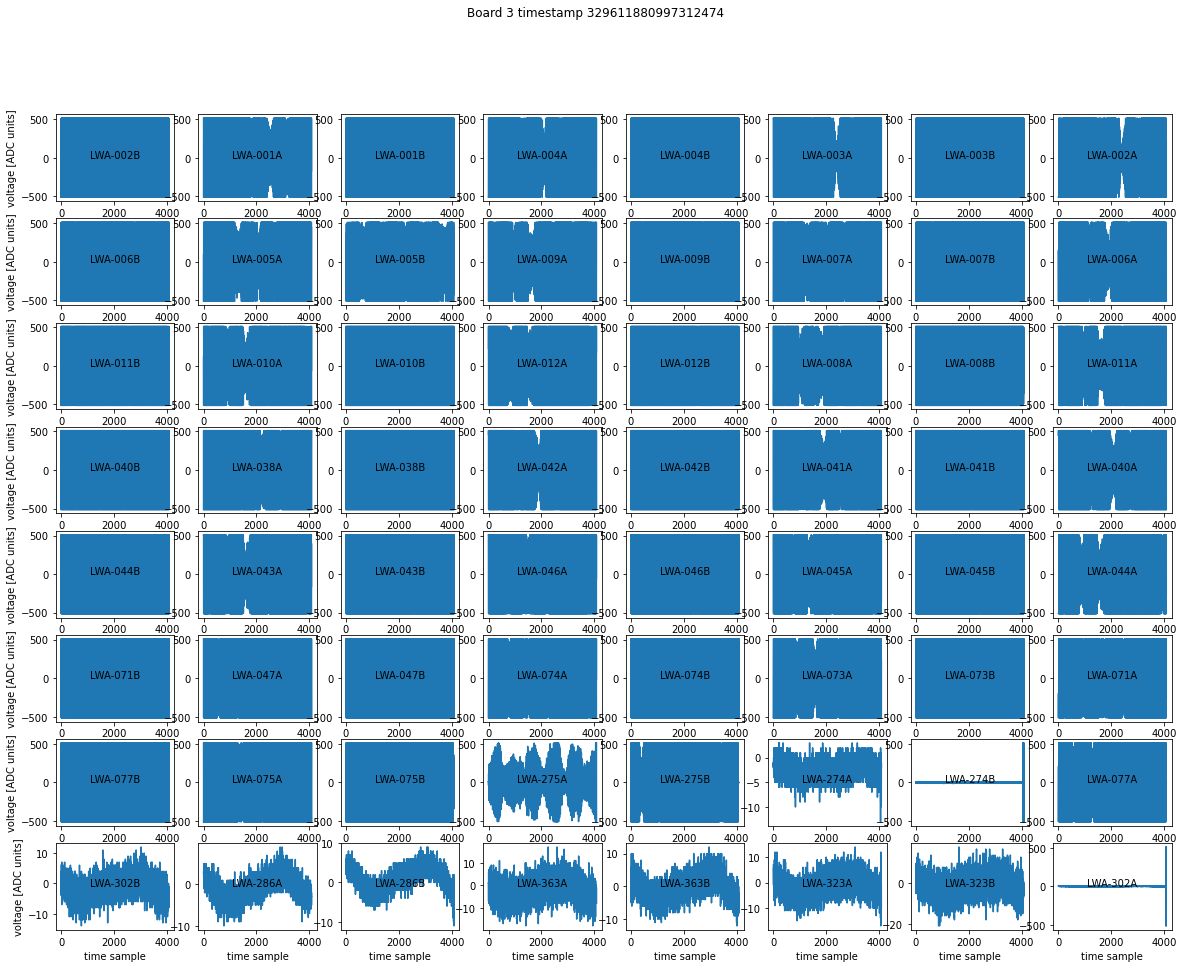

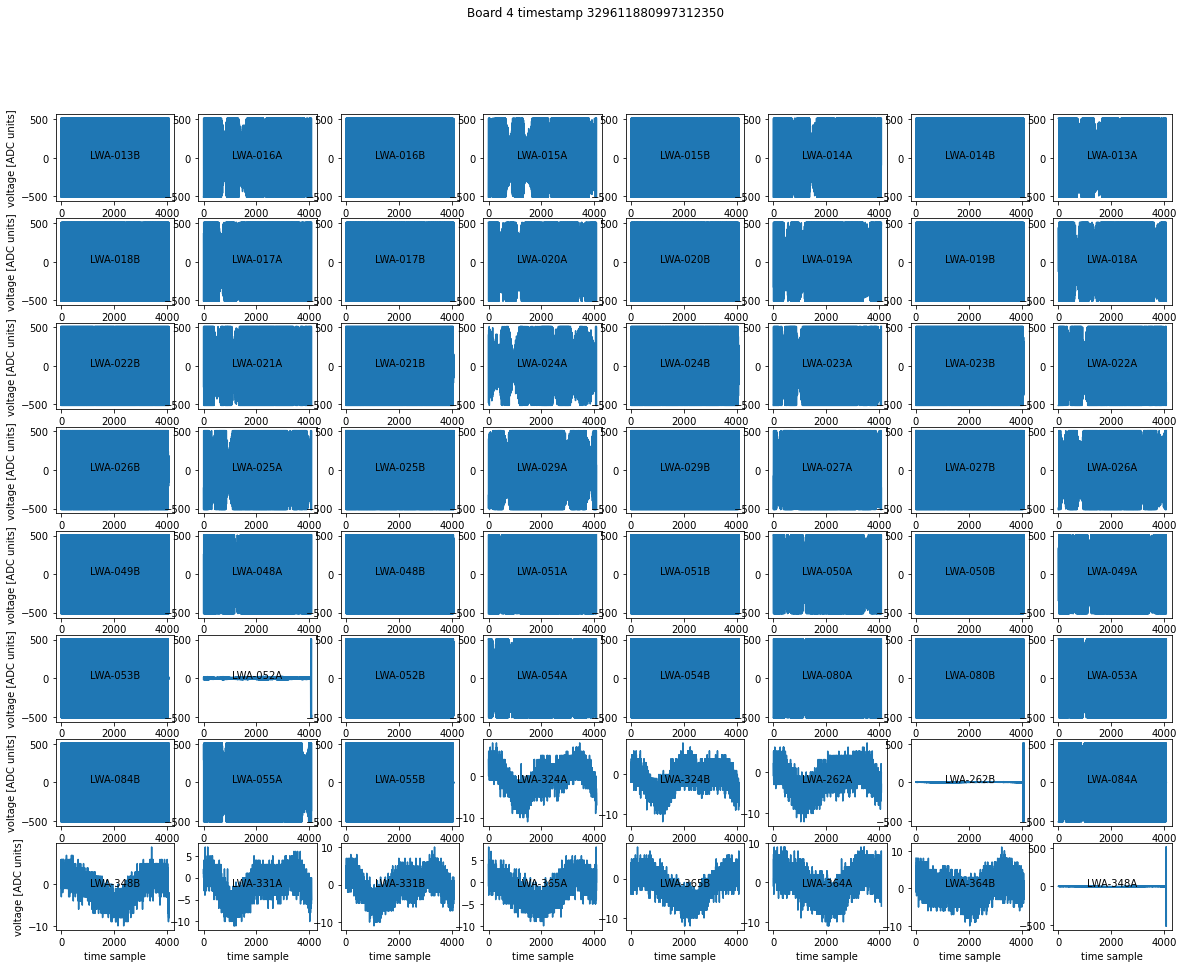

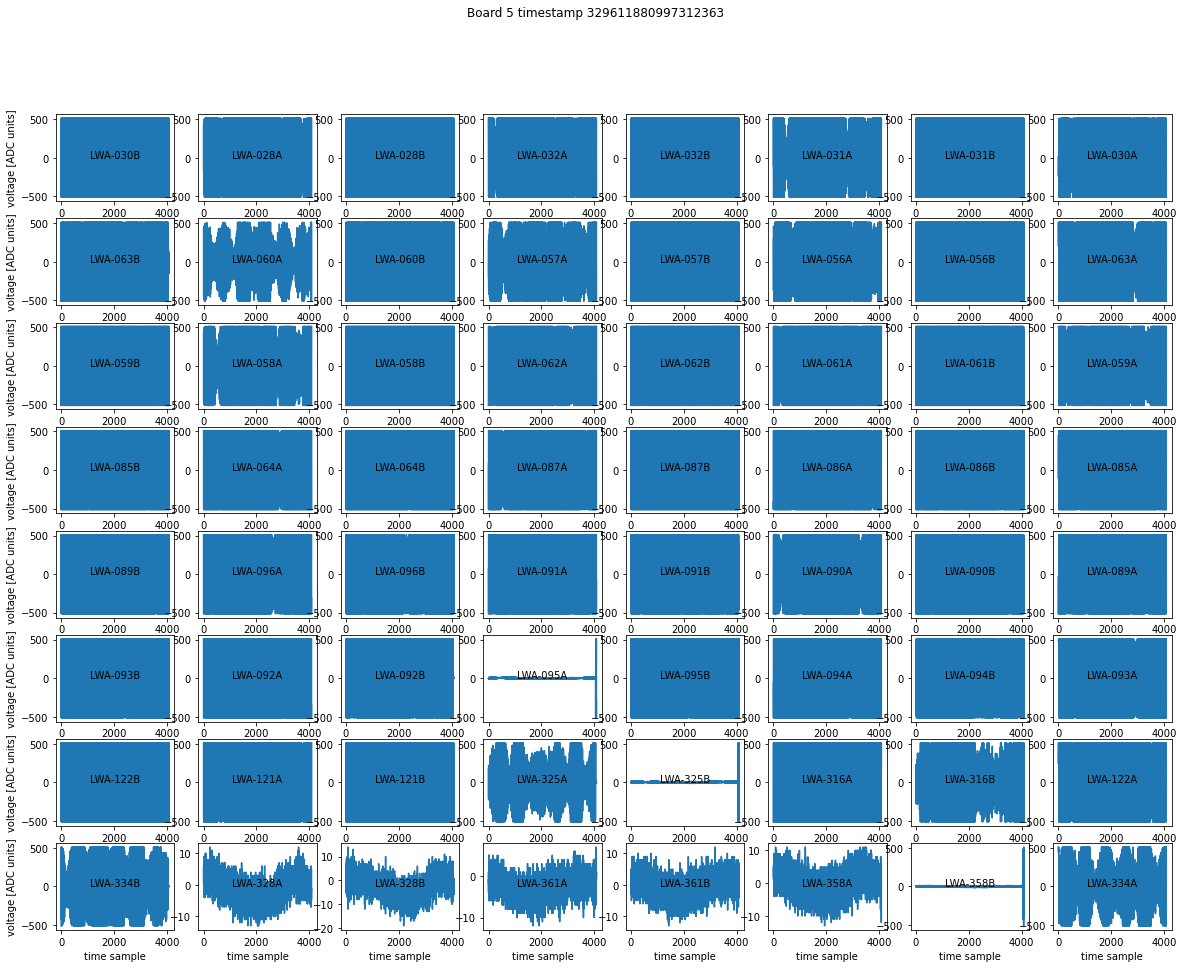

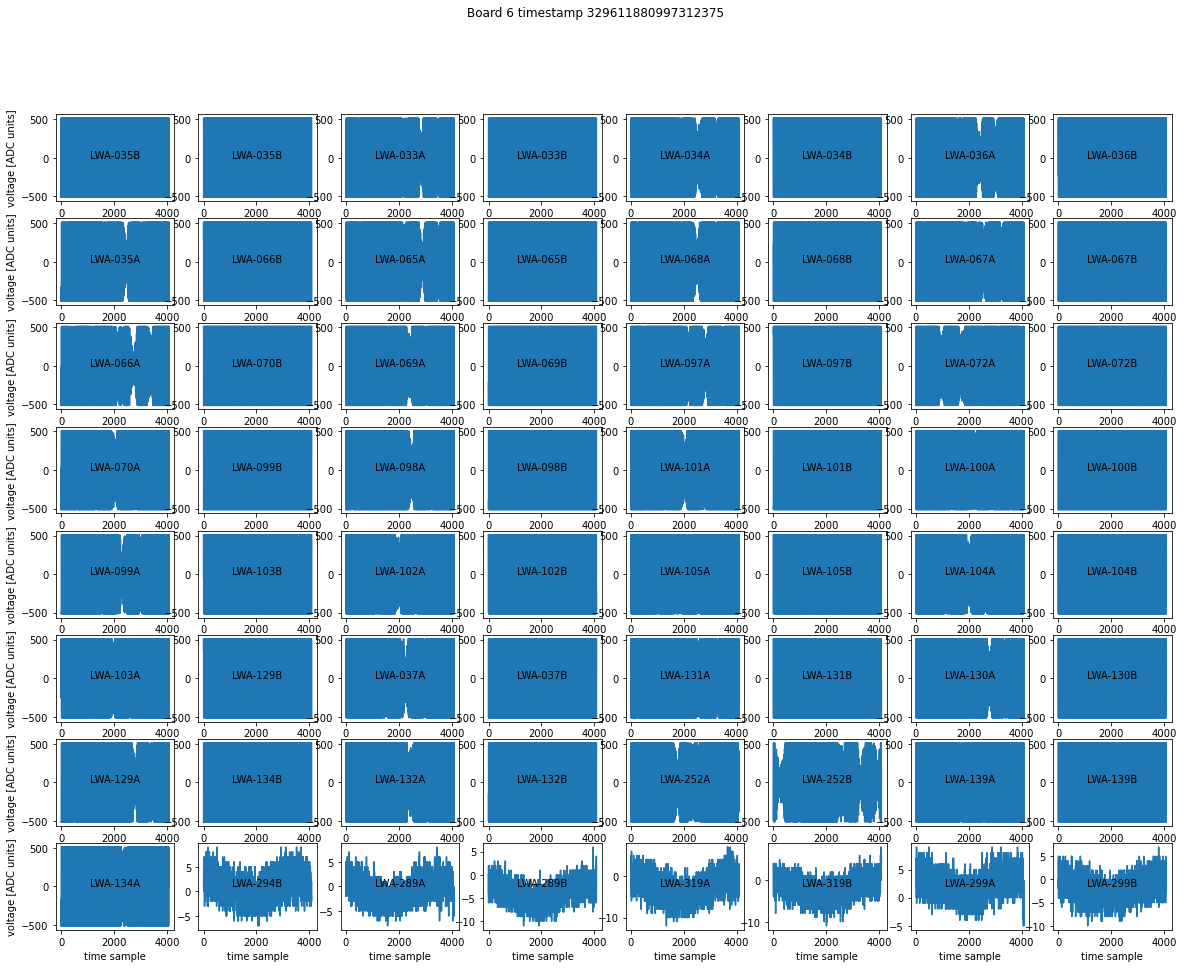

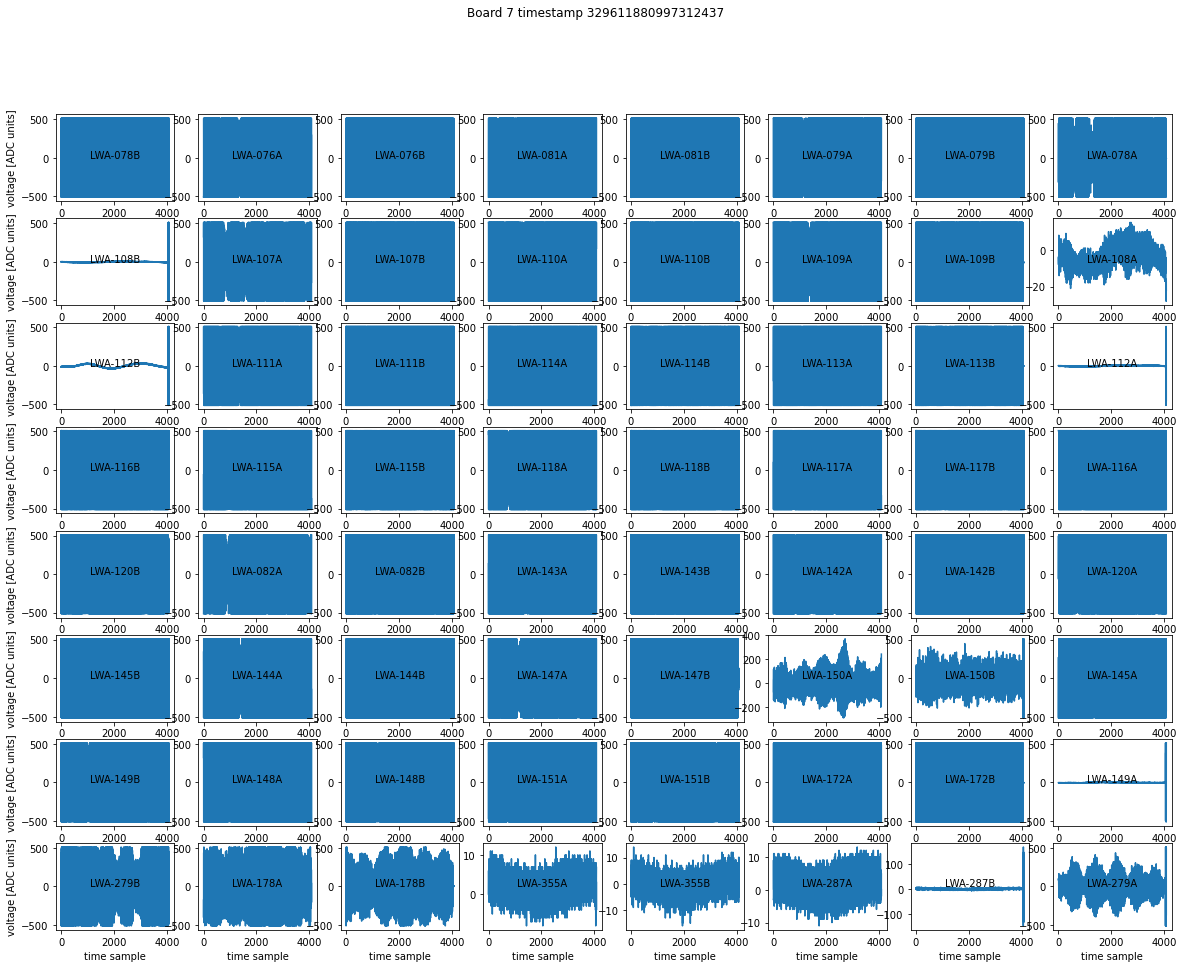

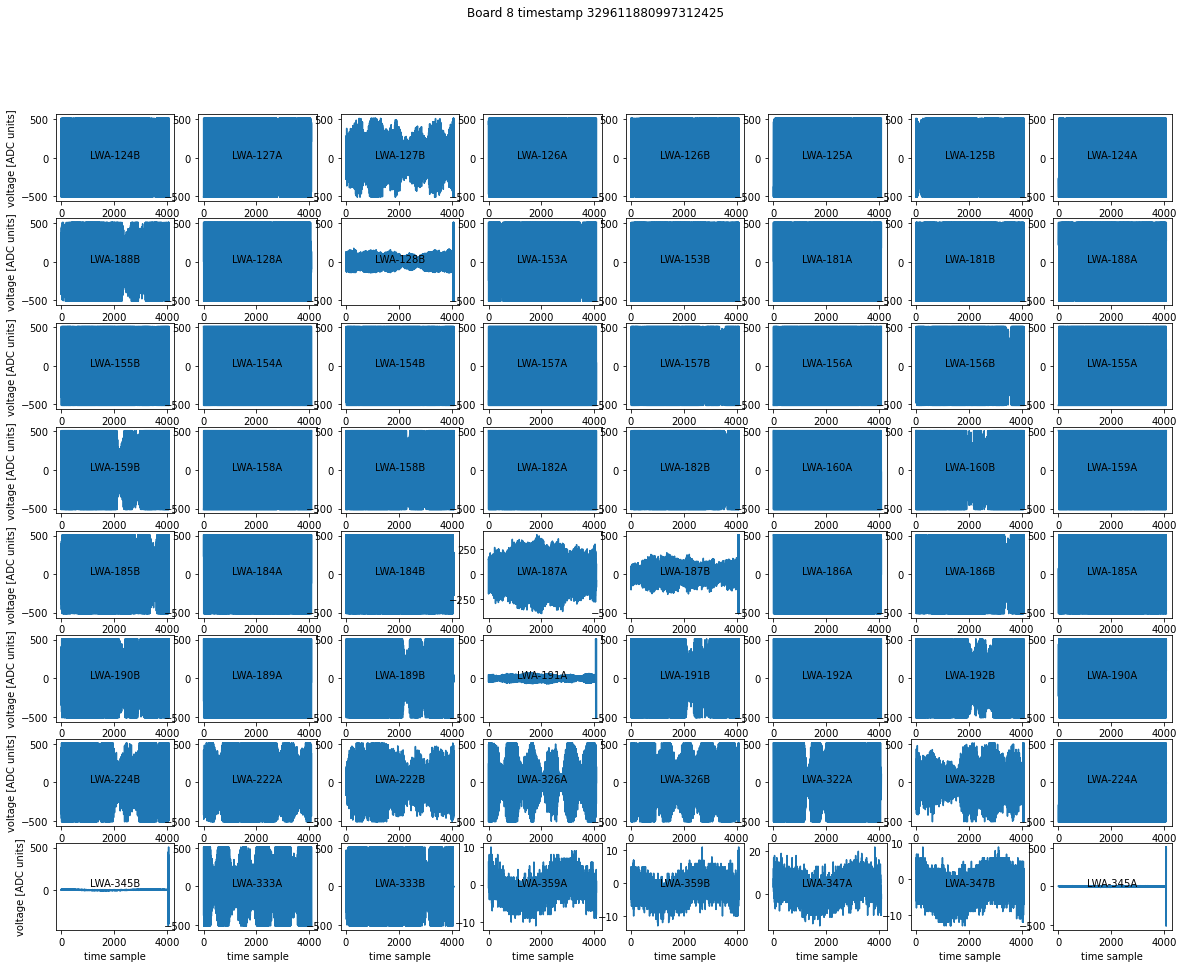

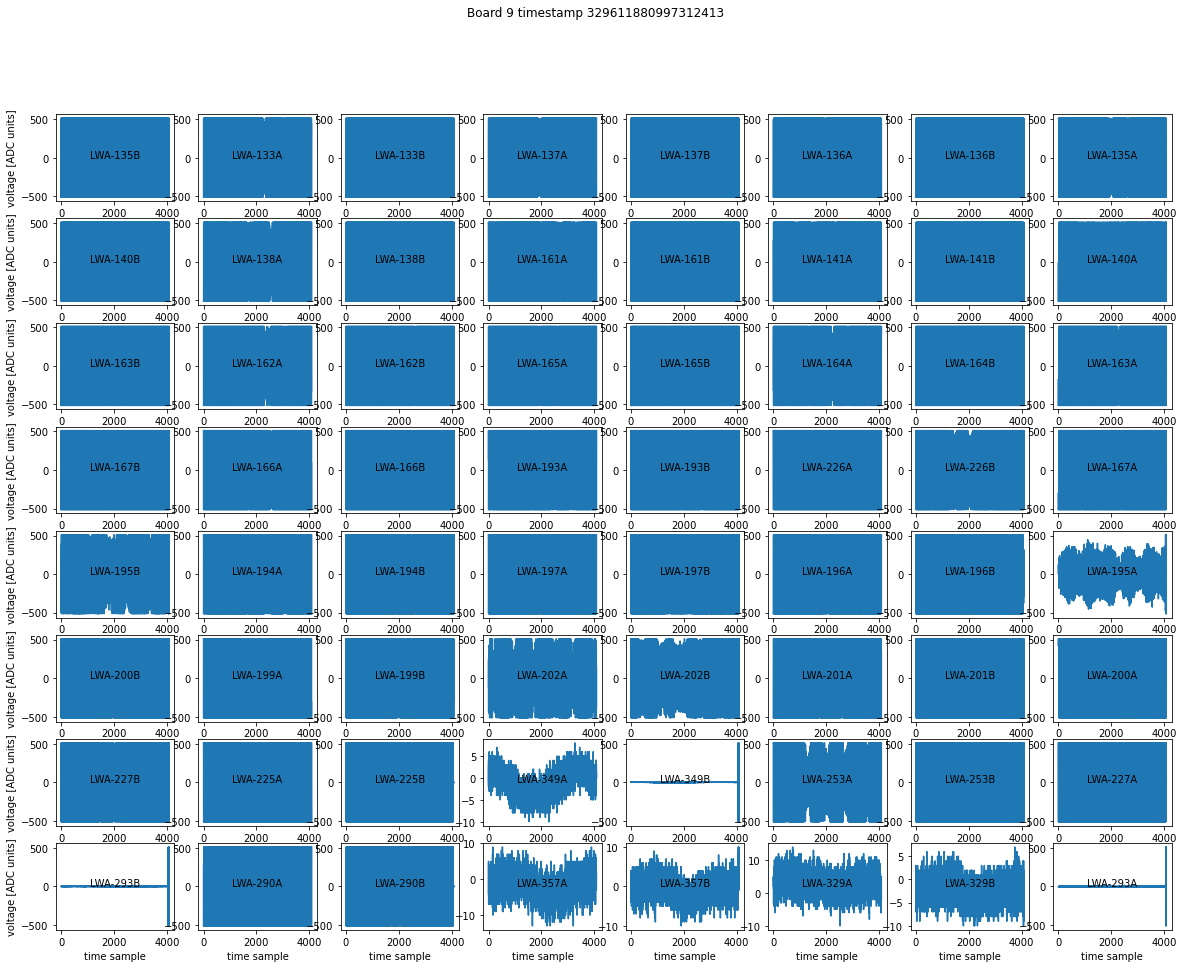

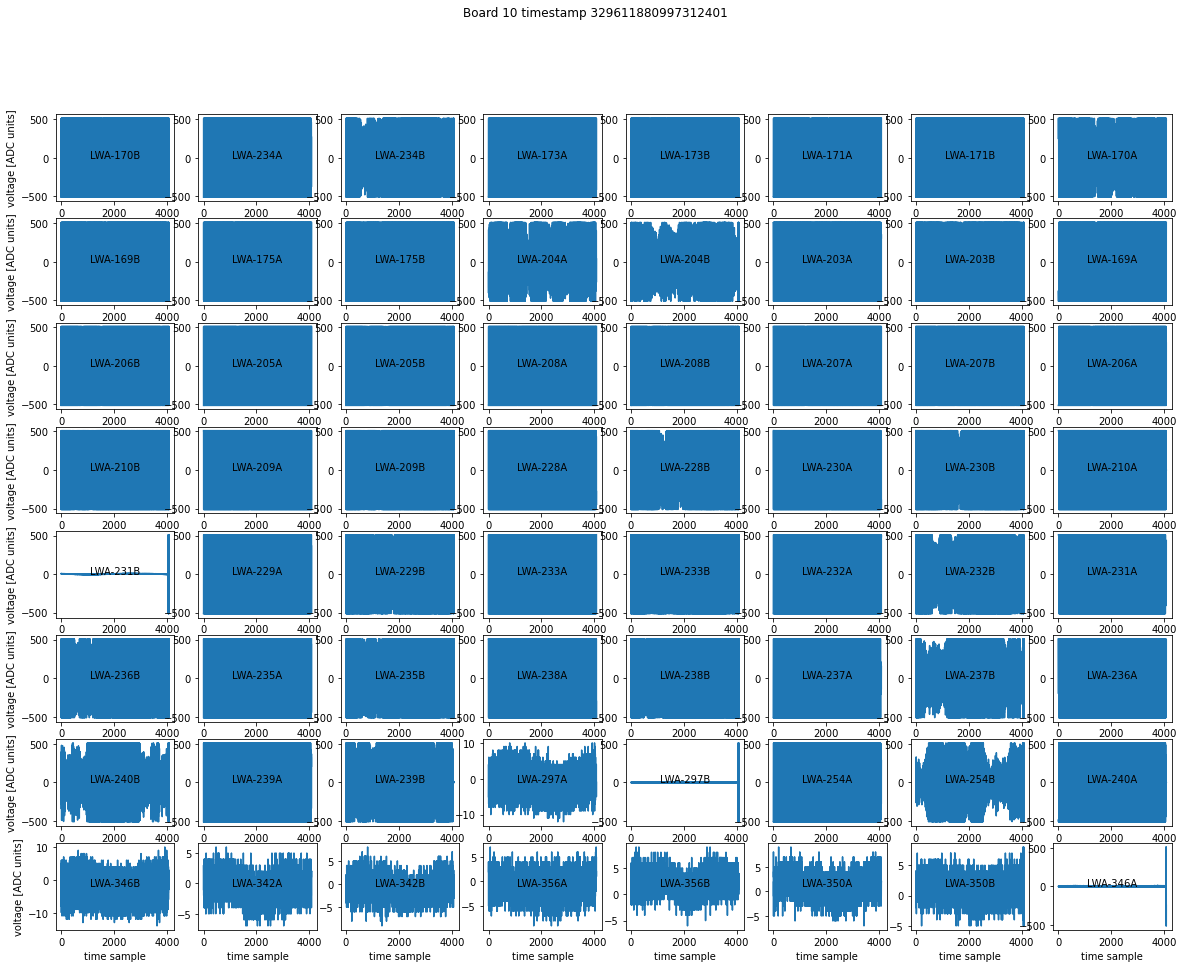

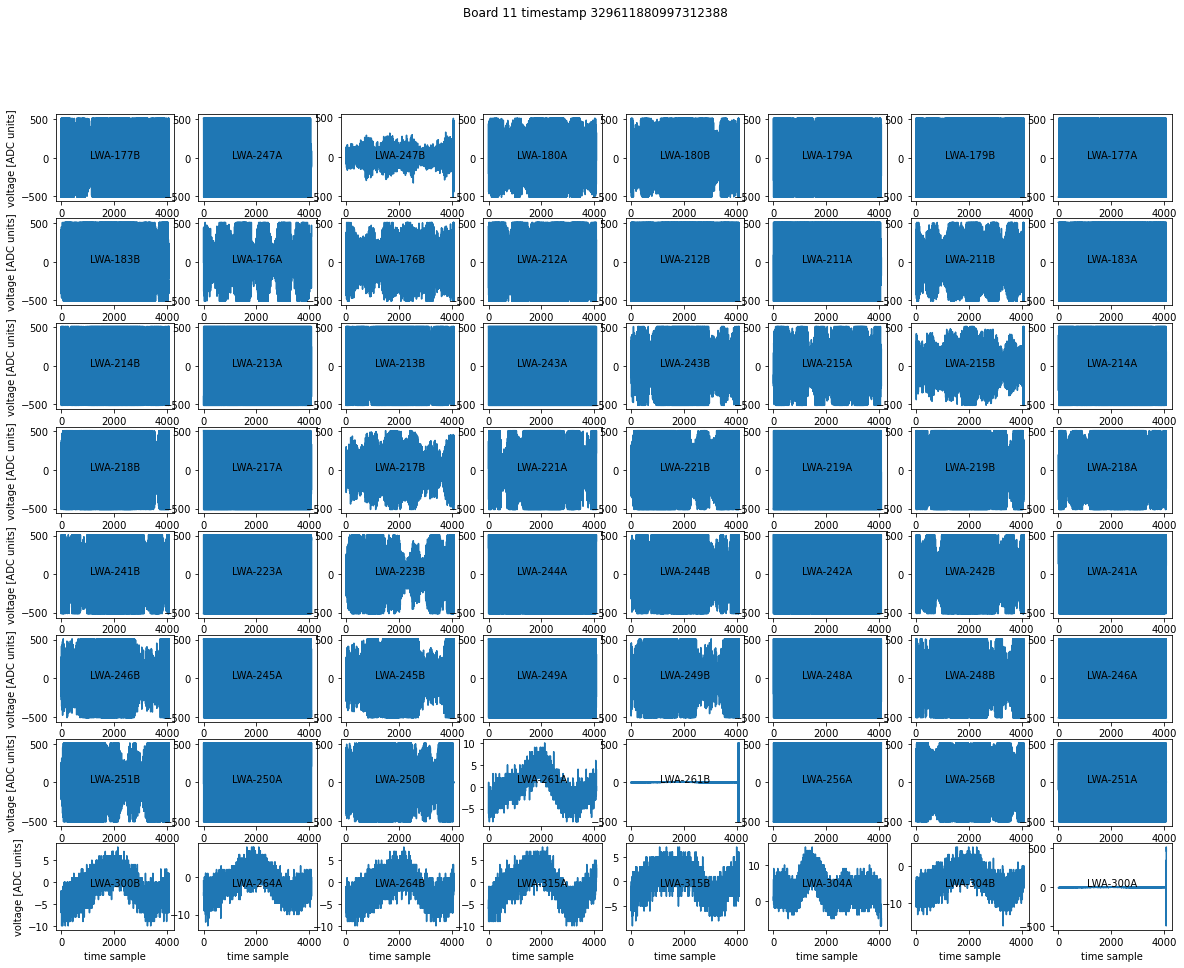

In [81]:
plot_all_timeseries(events[0])

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


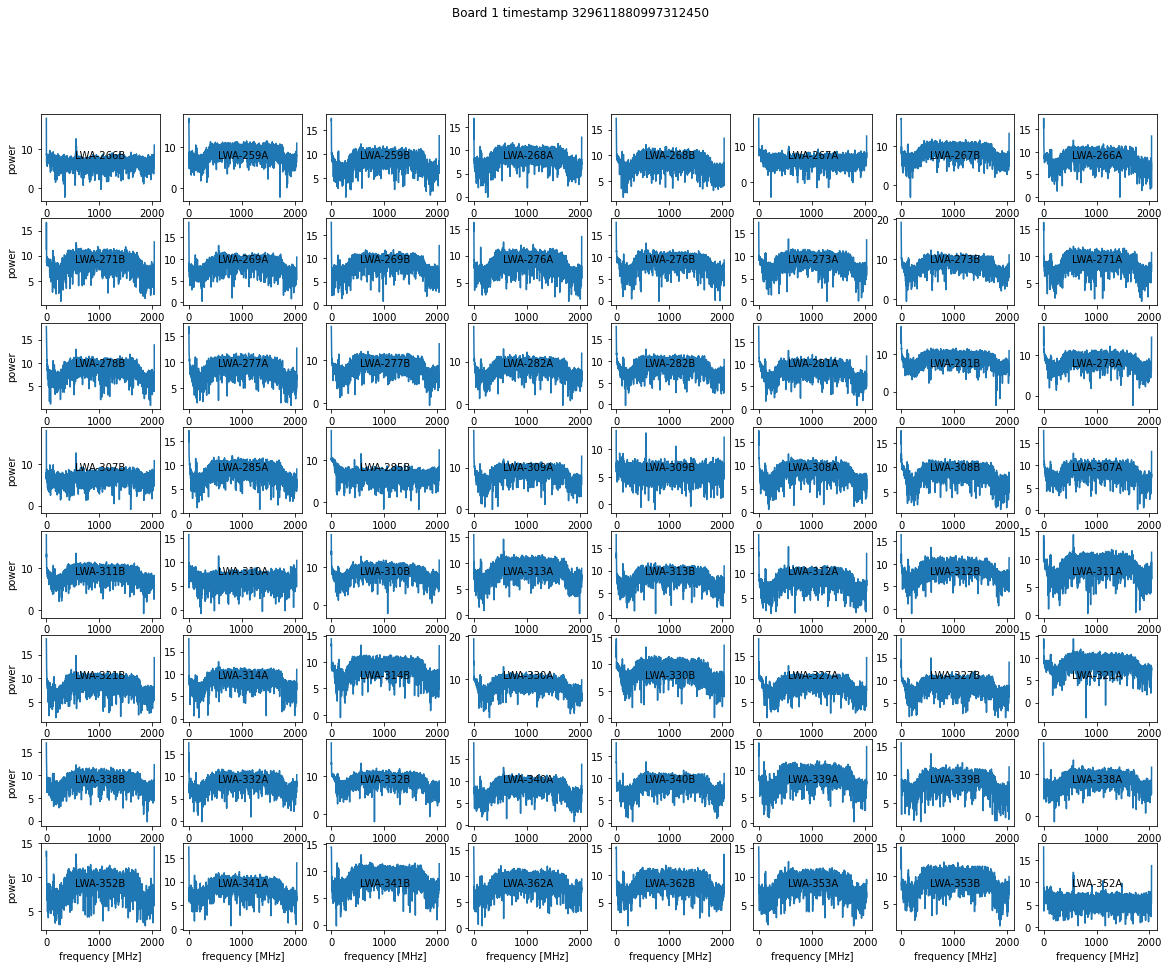

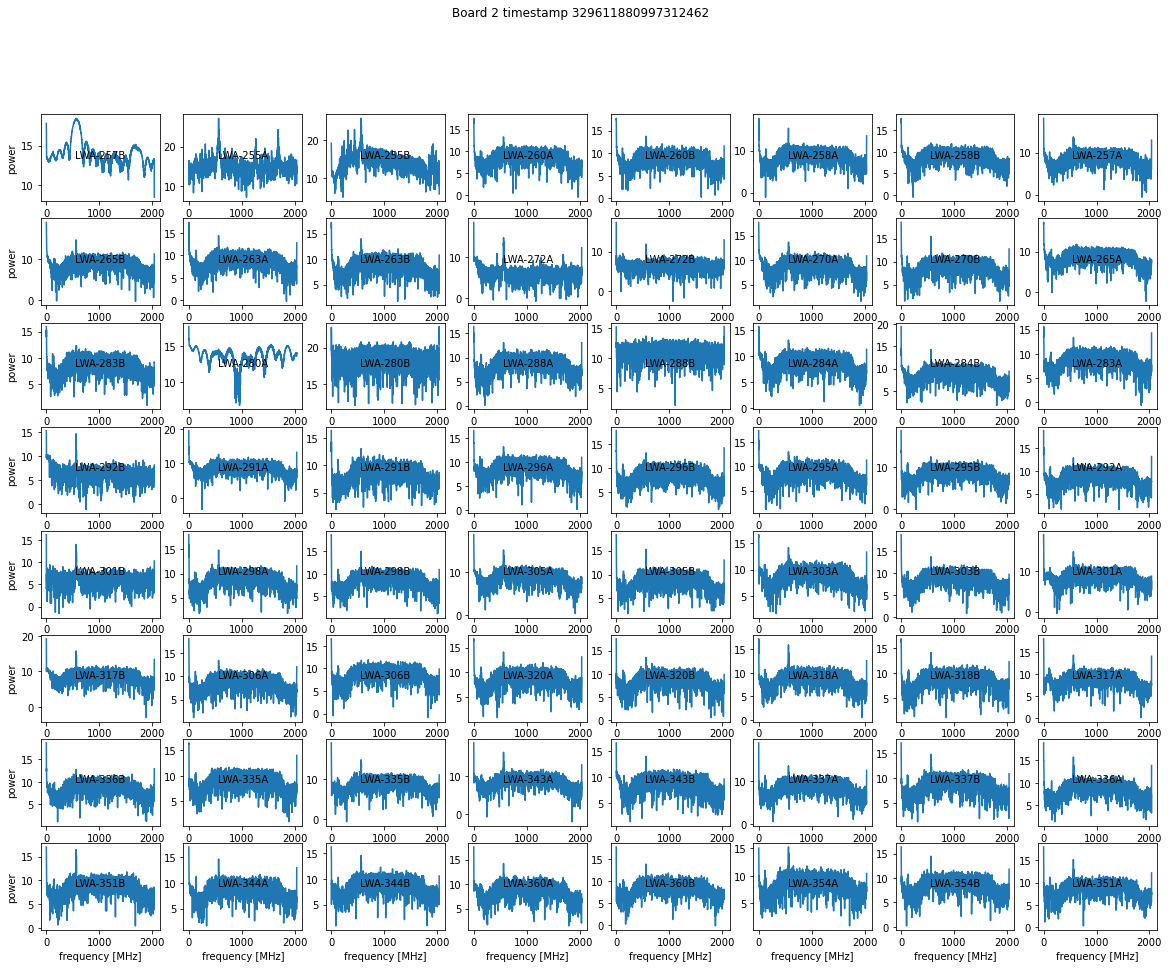

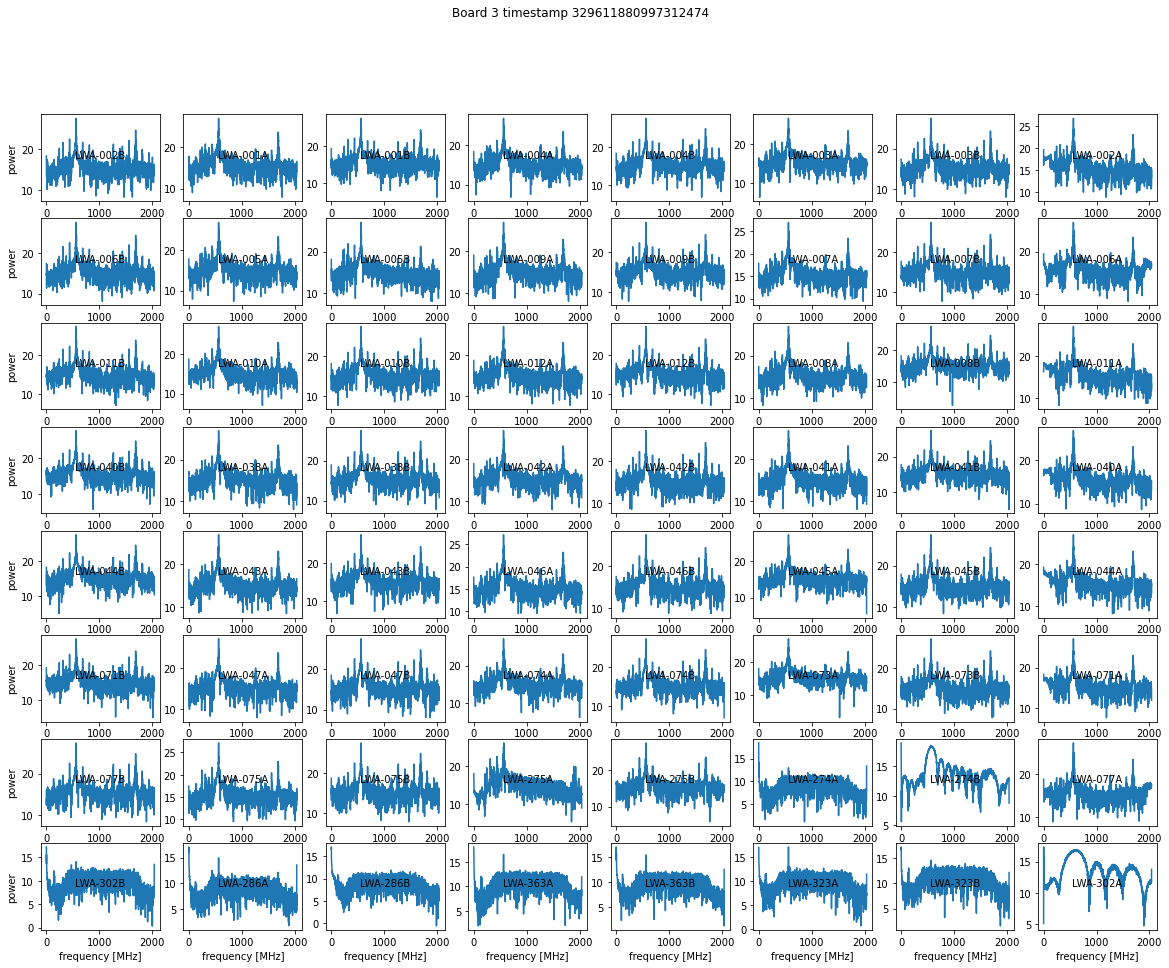

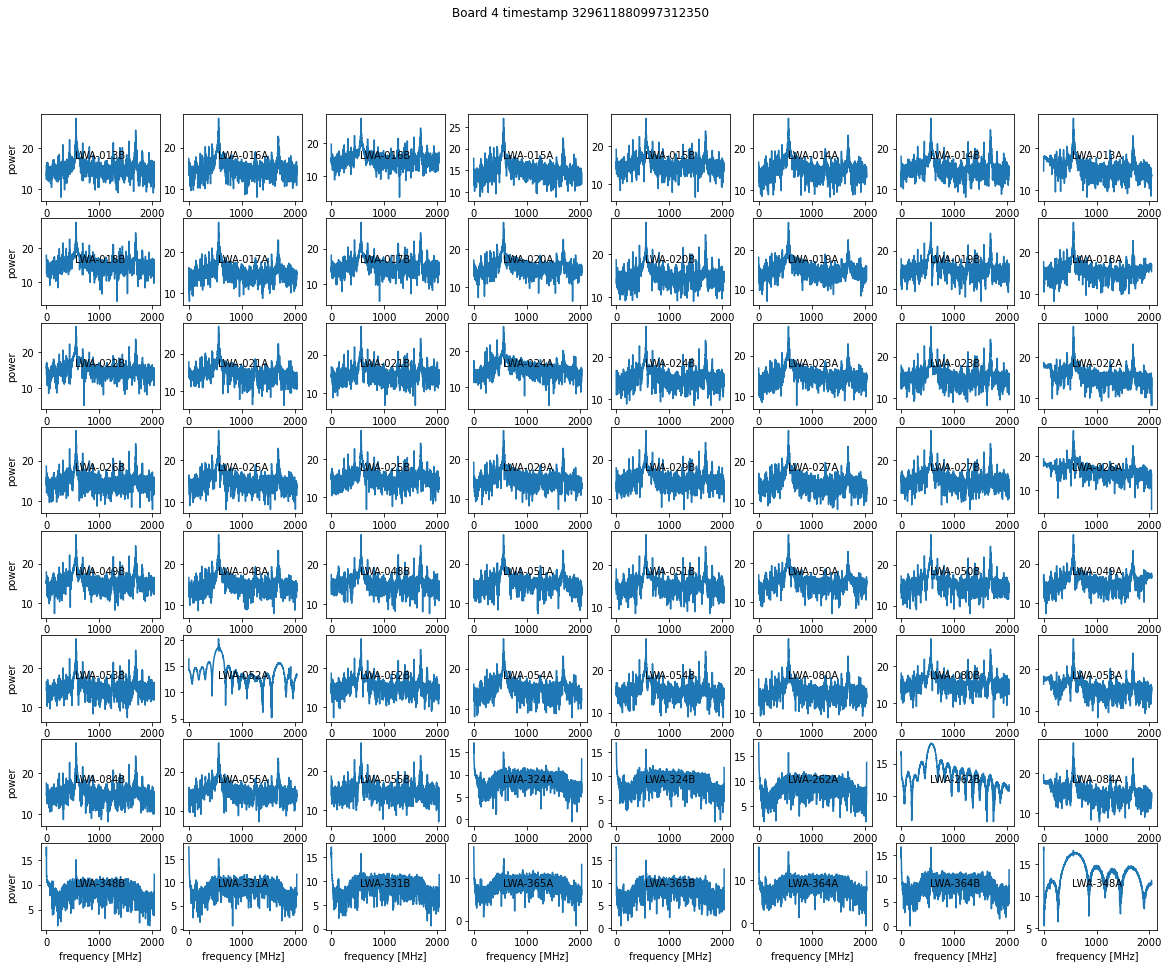

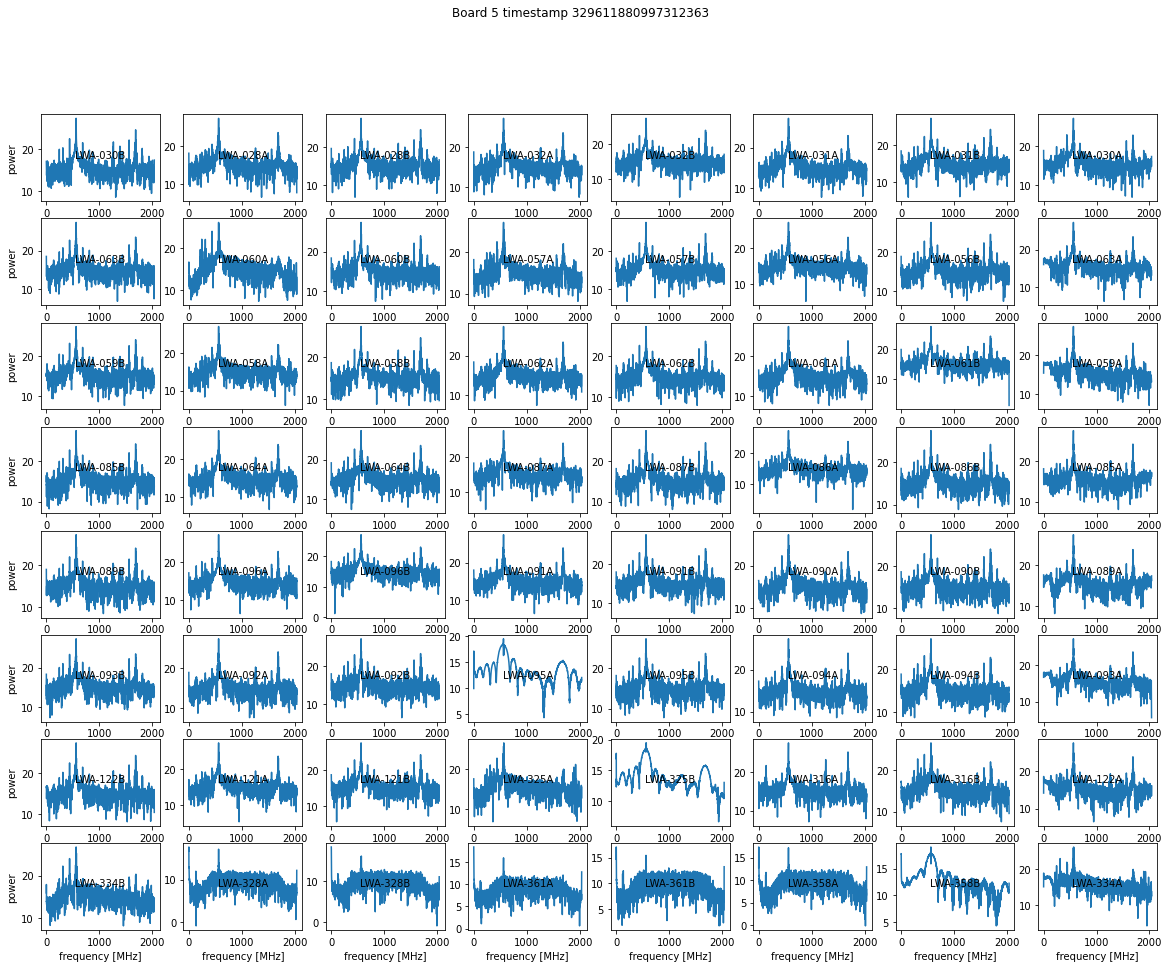

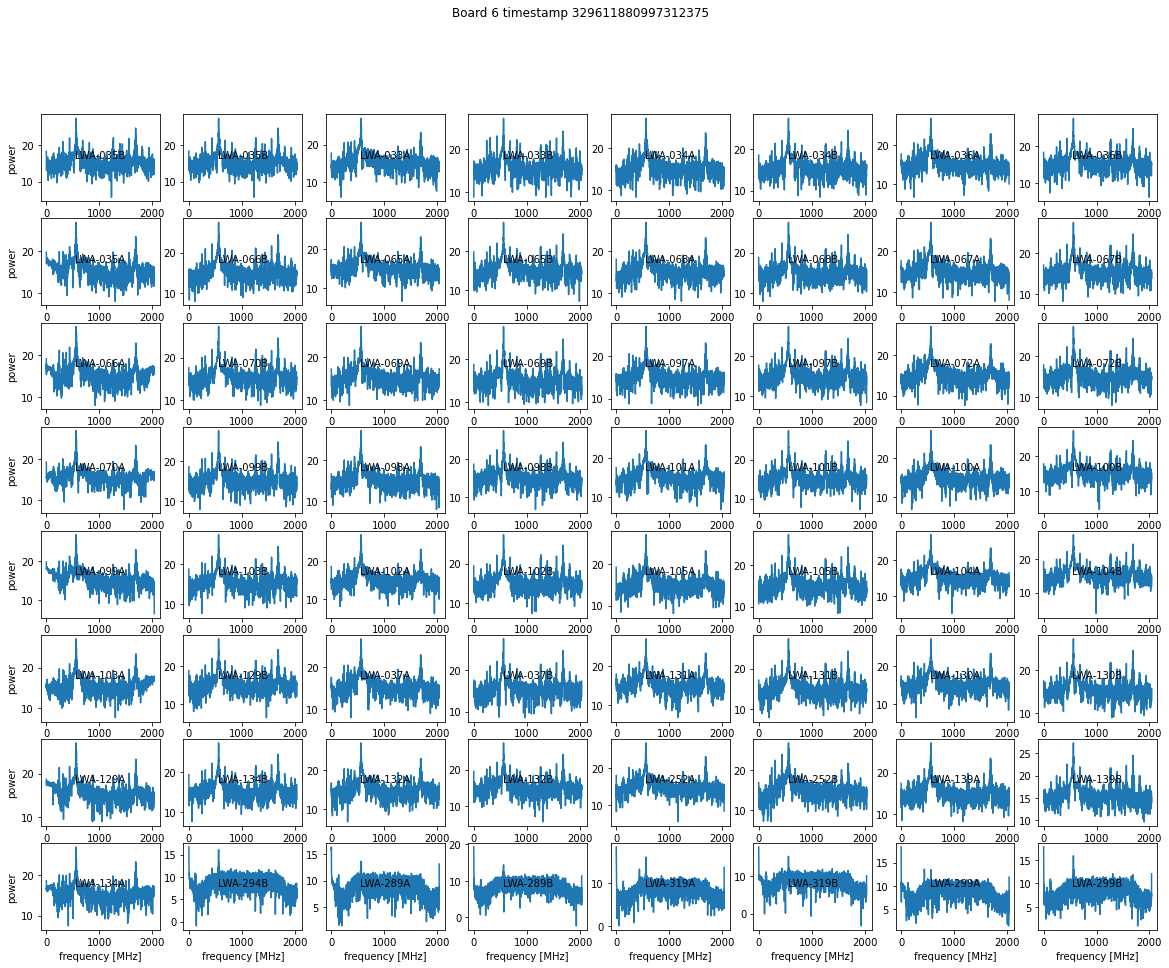

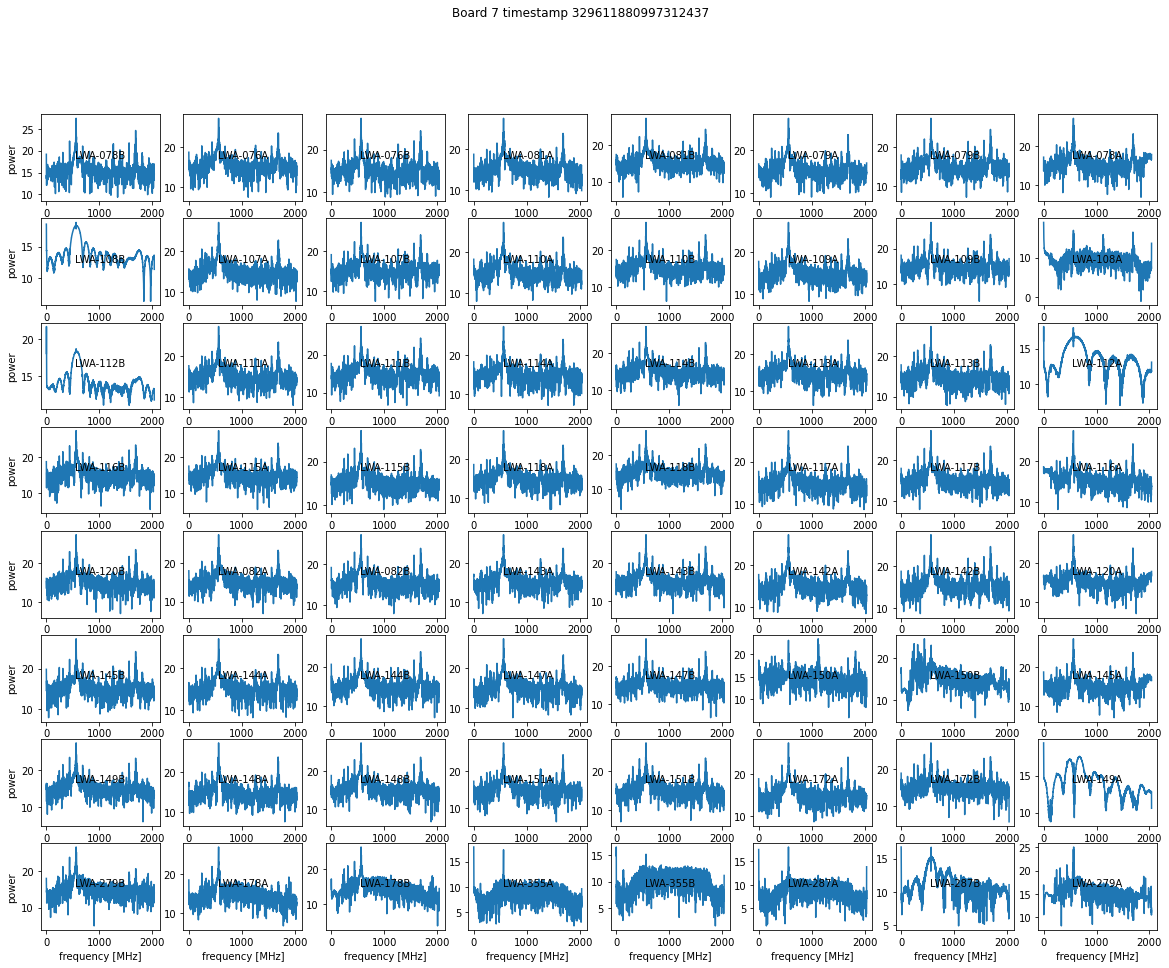

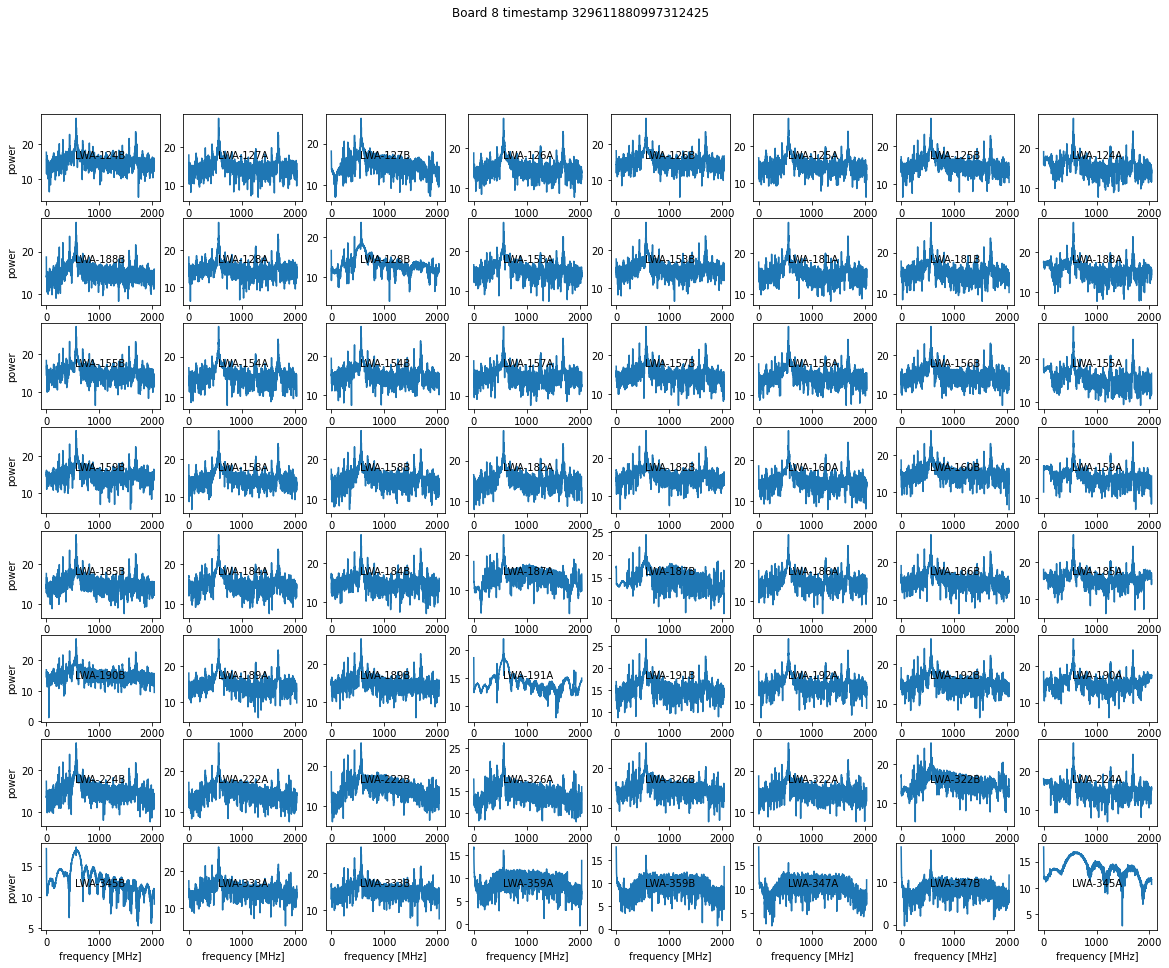

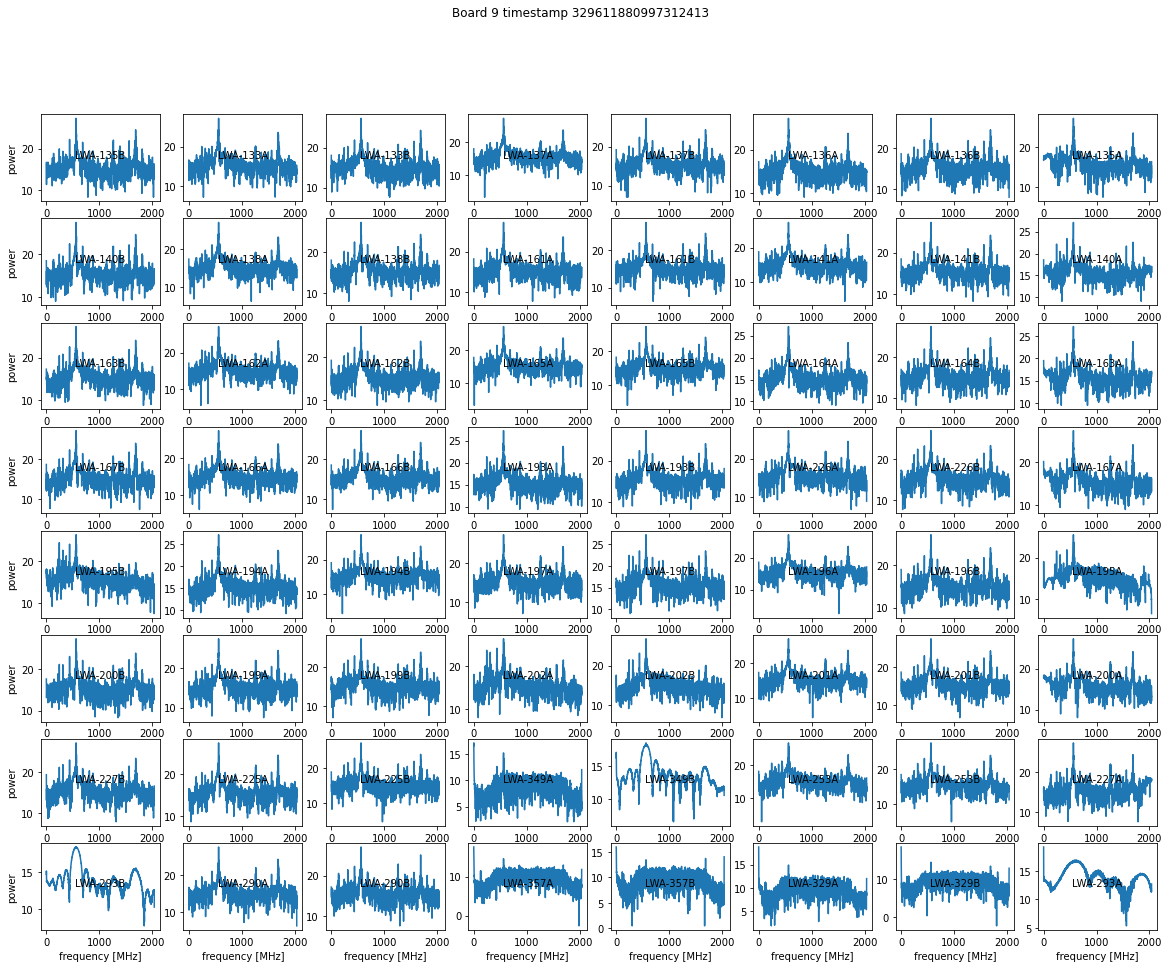

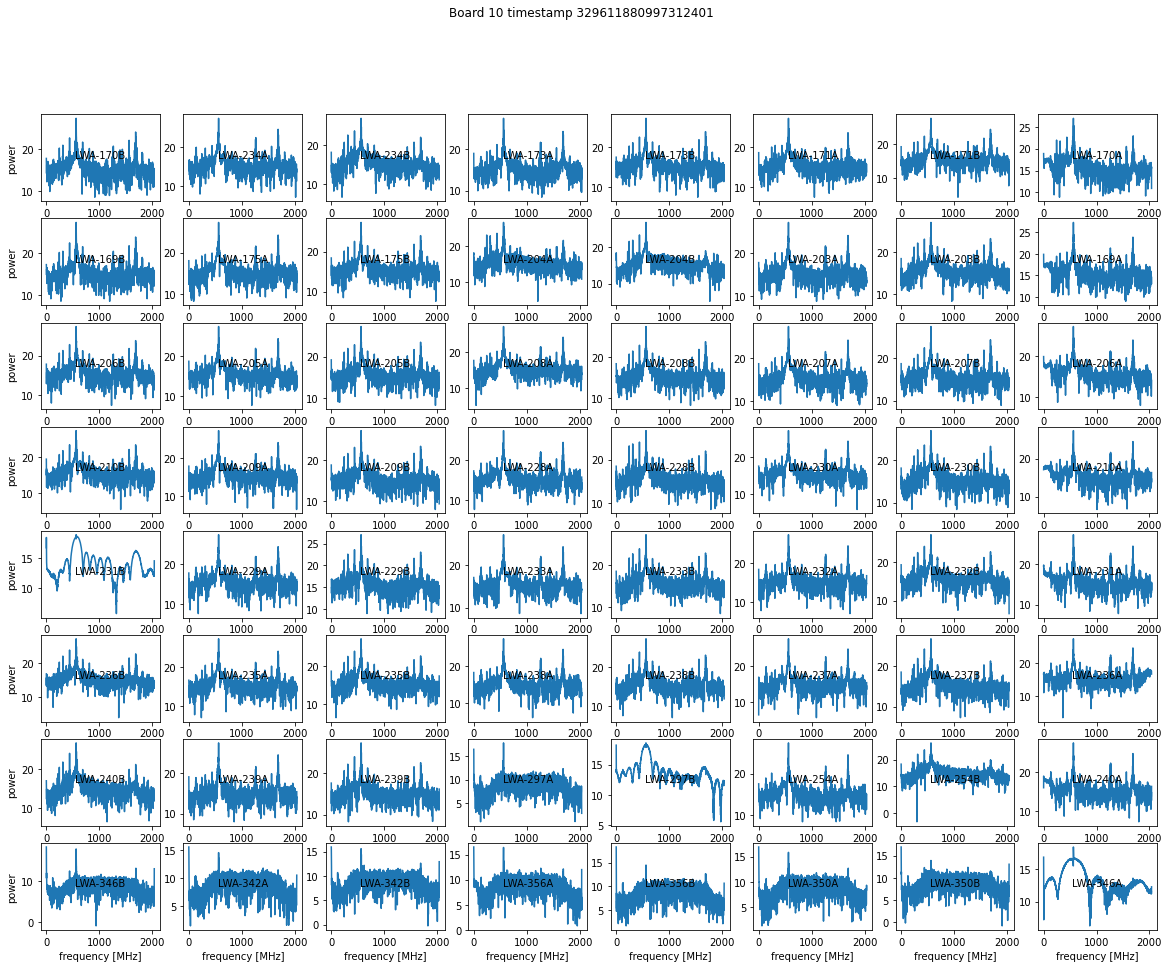

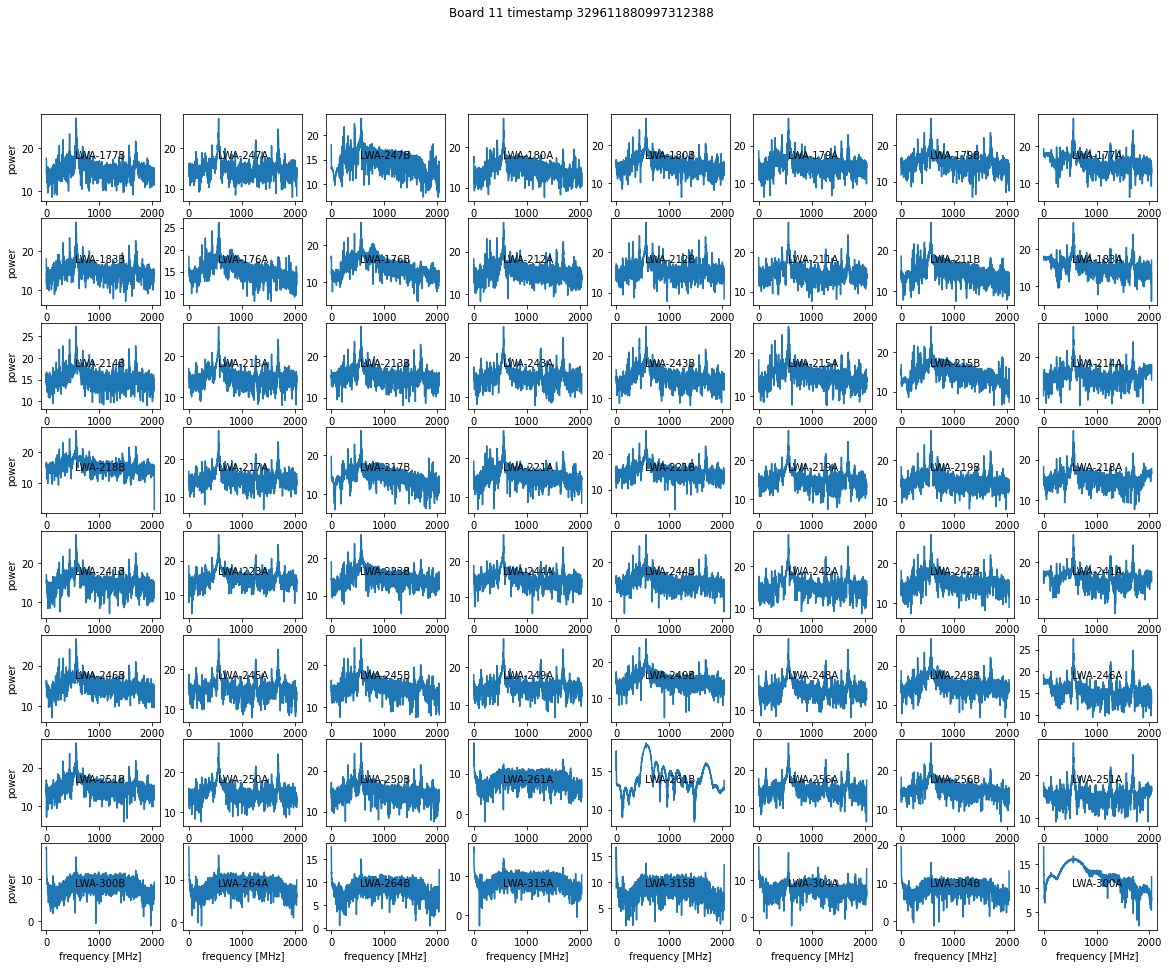

In [78]:
plot_all_spectra(events[0])

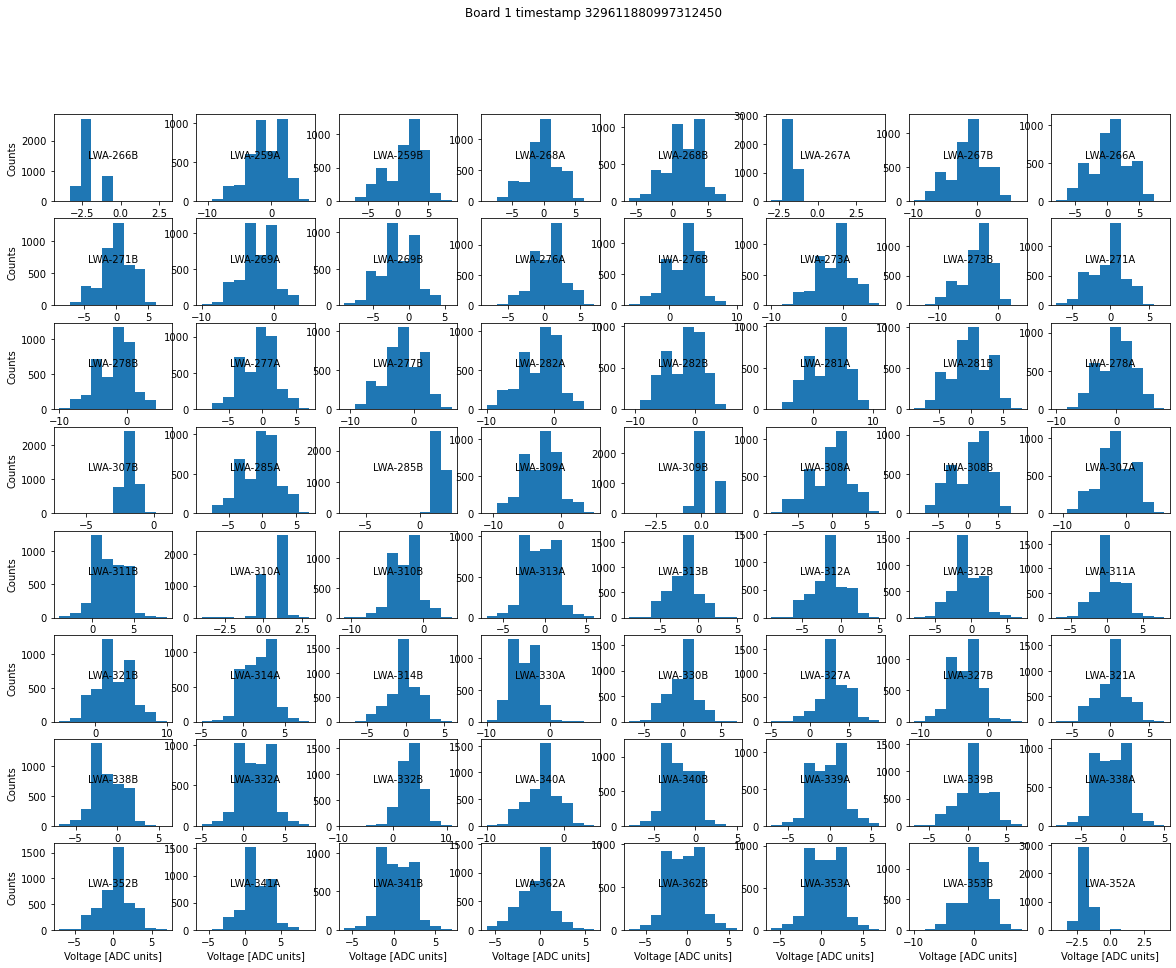

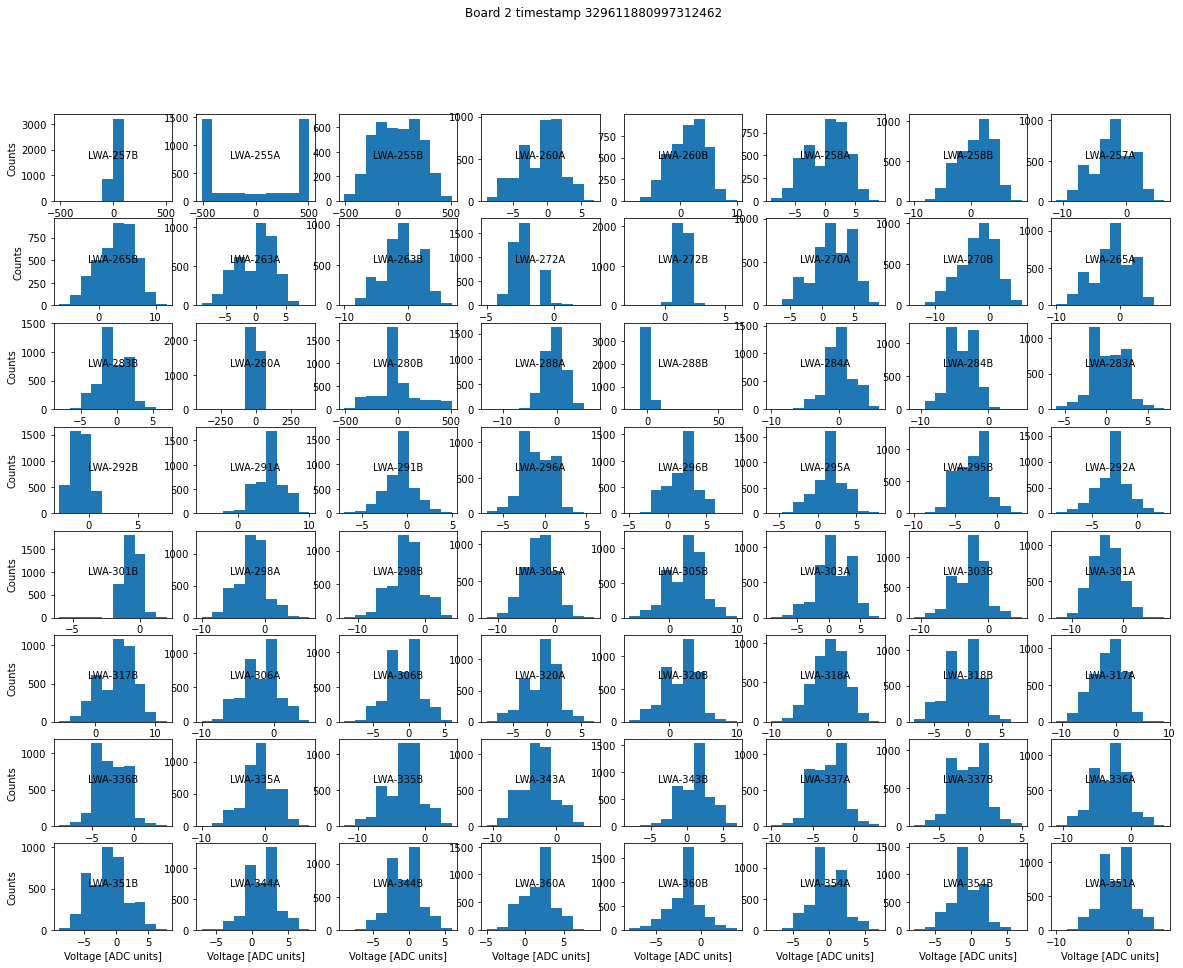

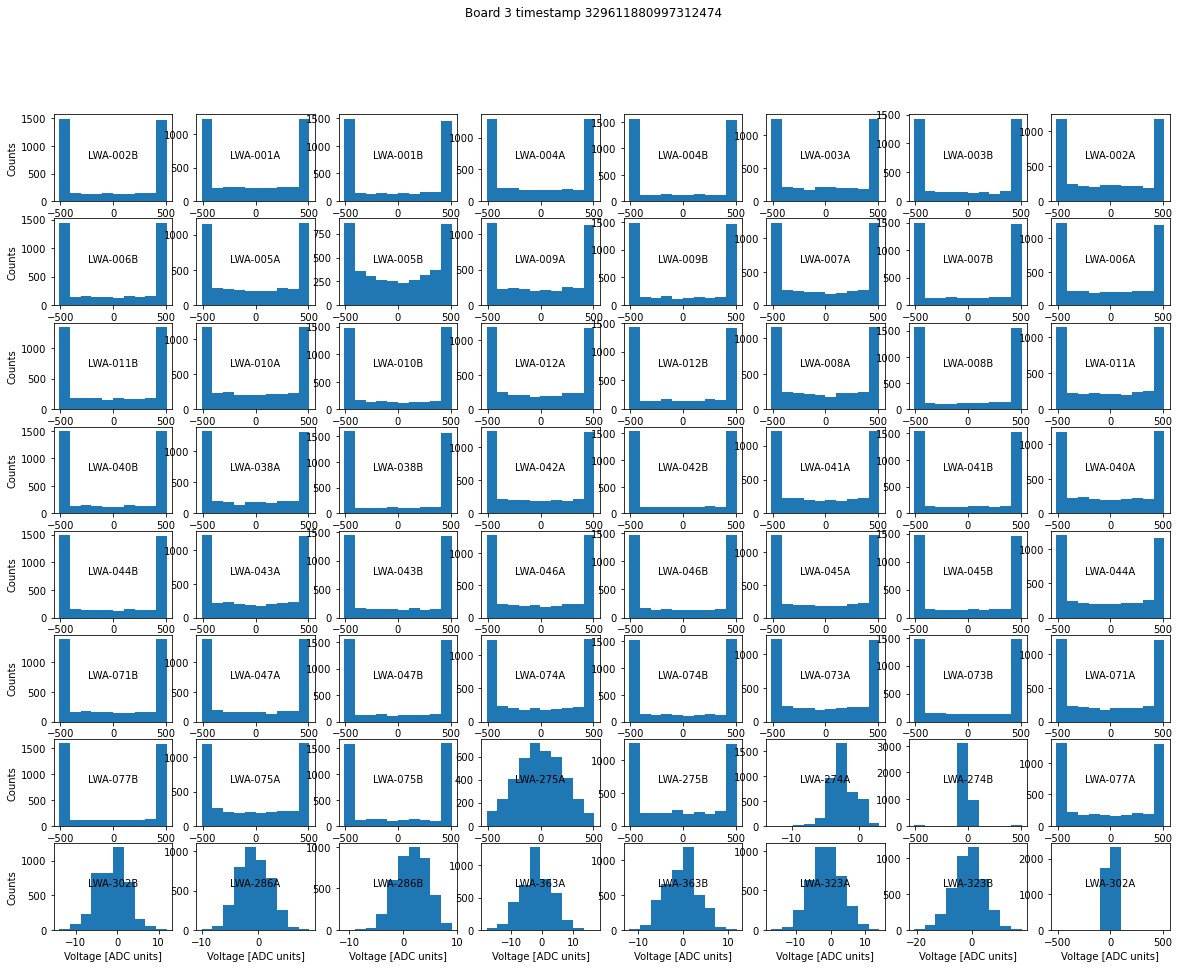

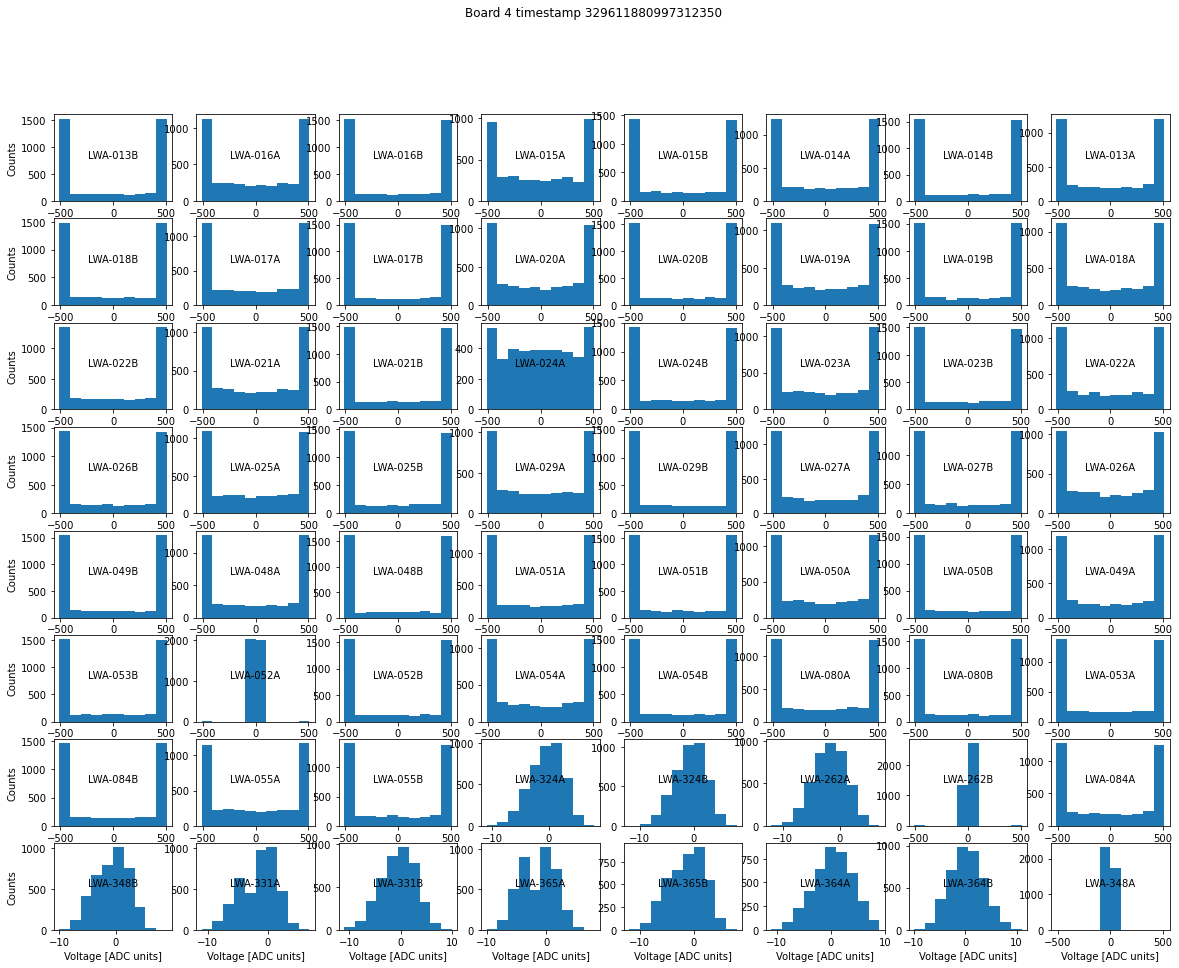

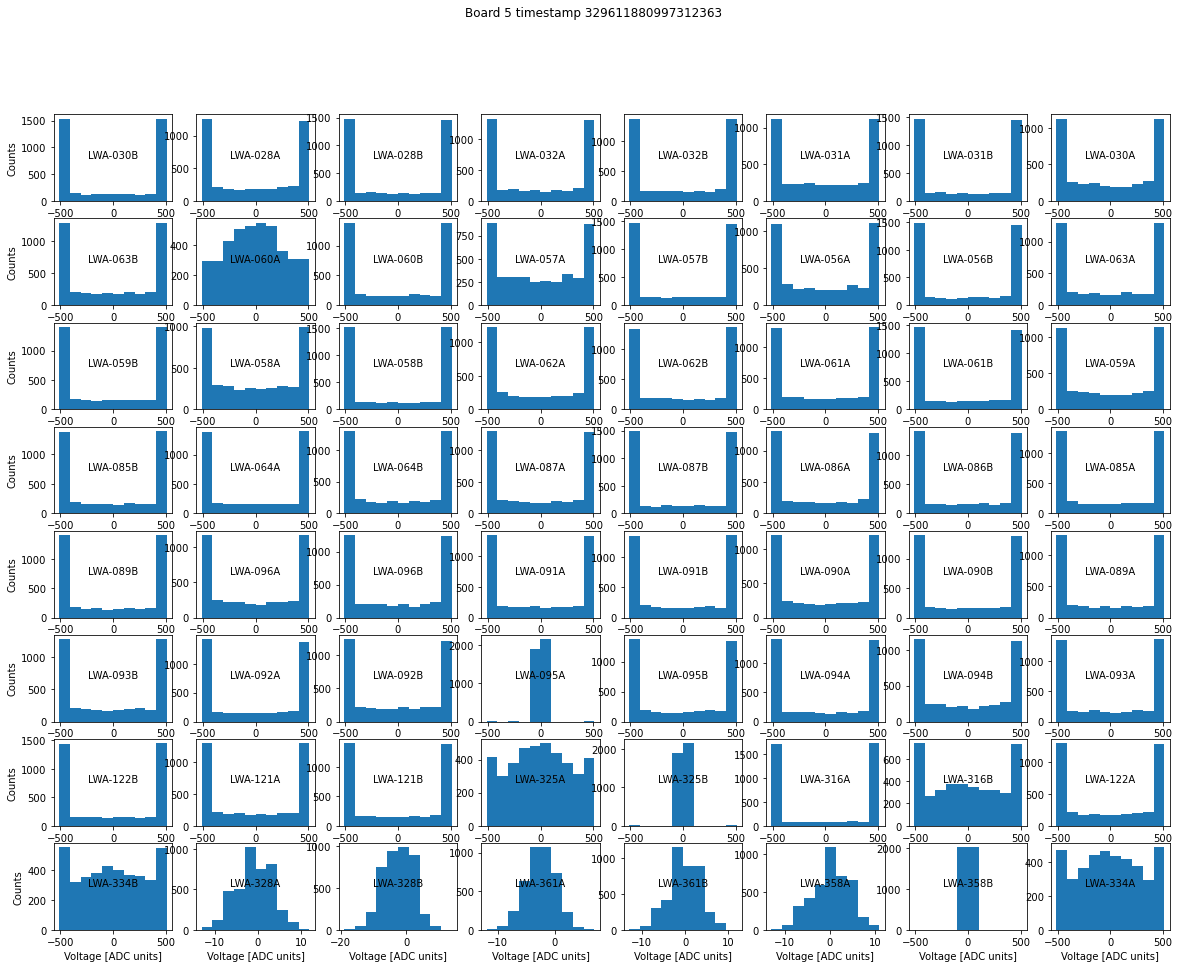

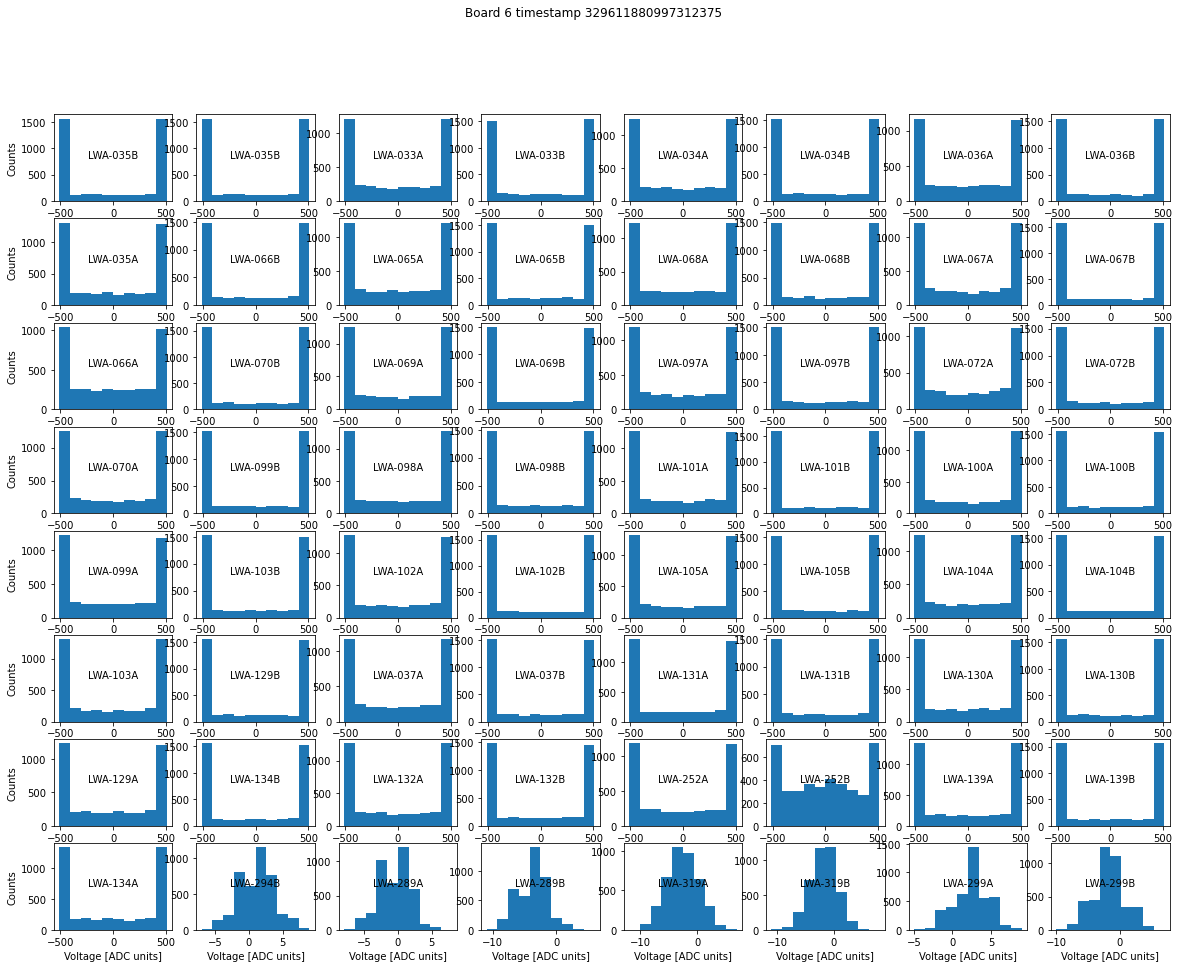

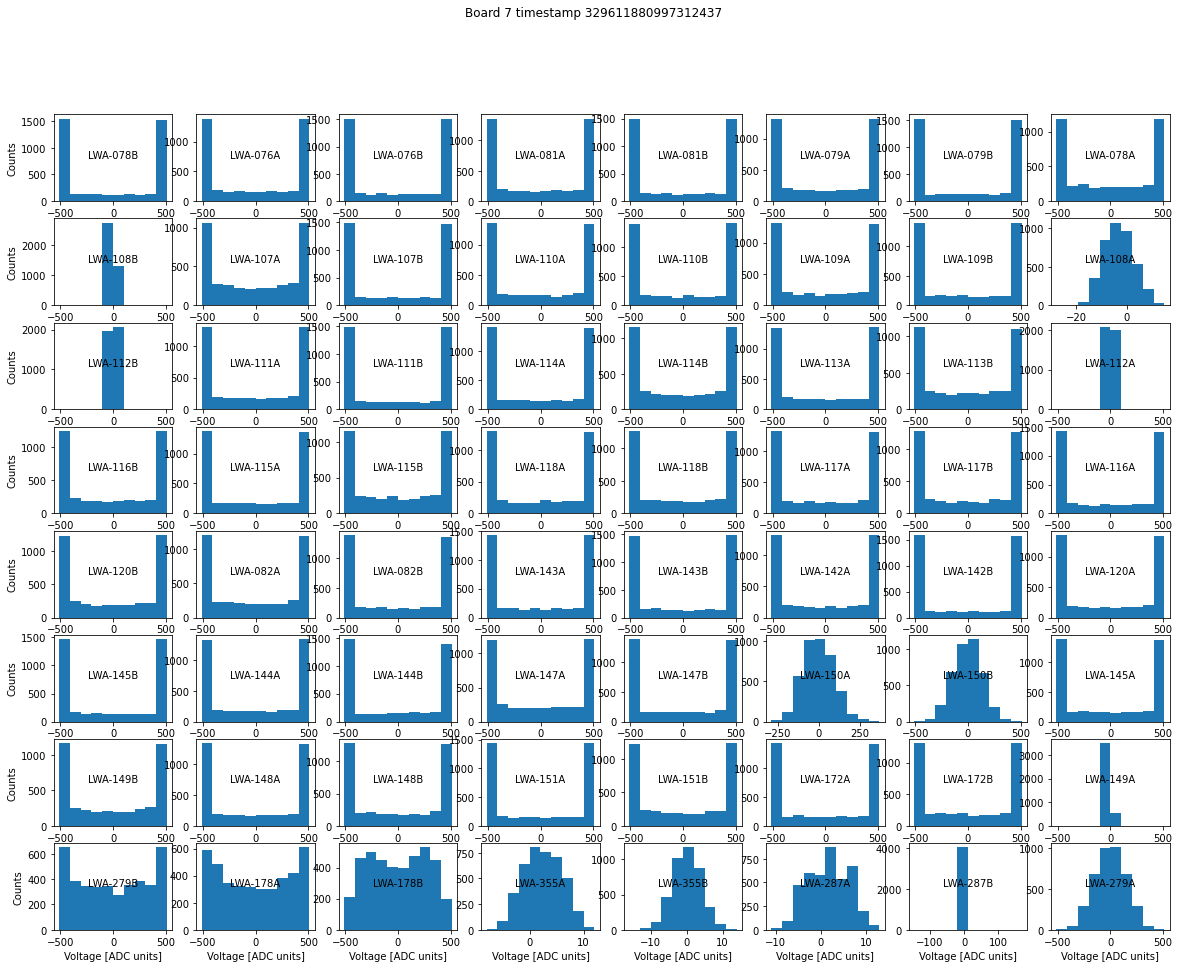

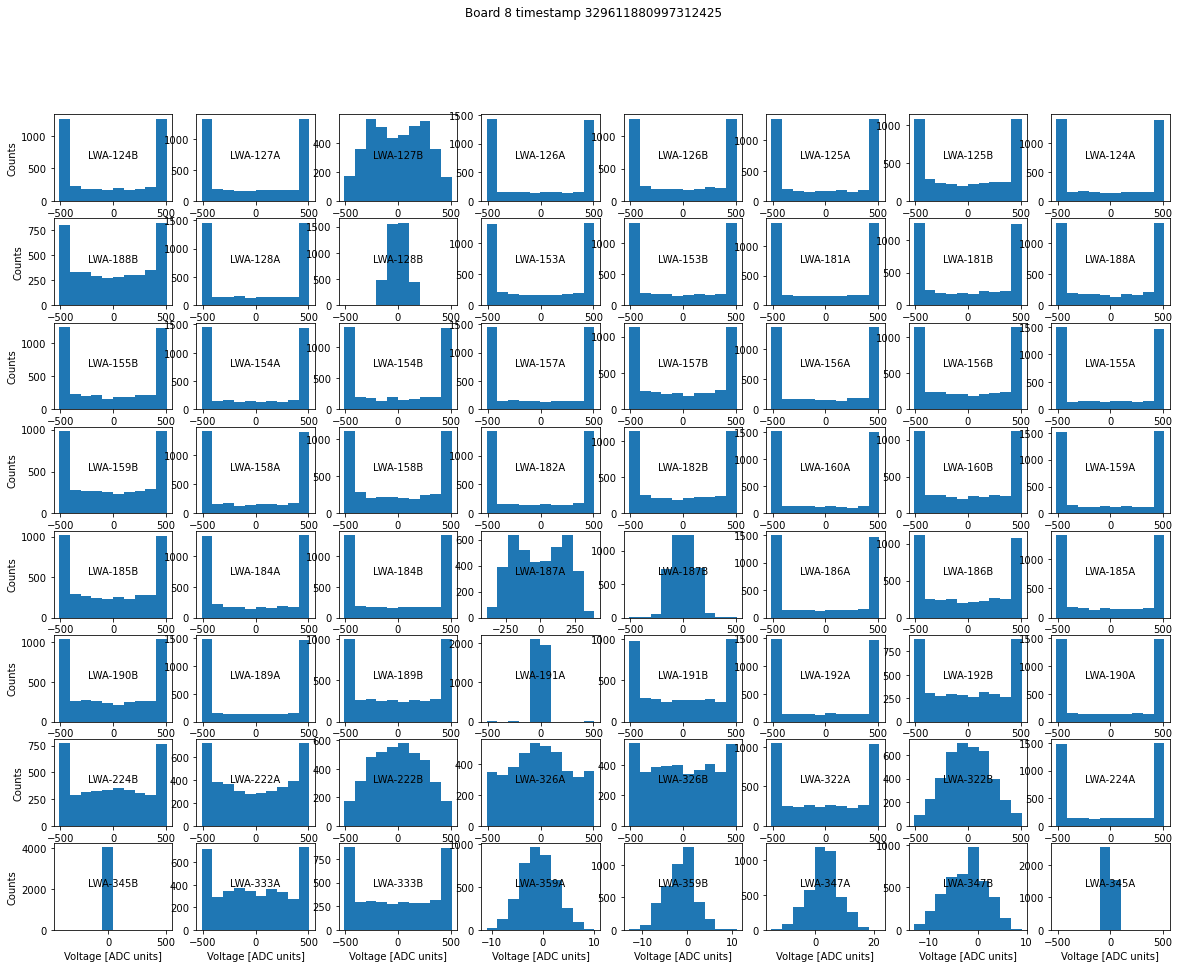

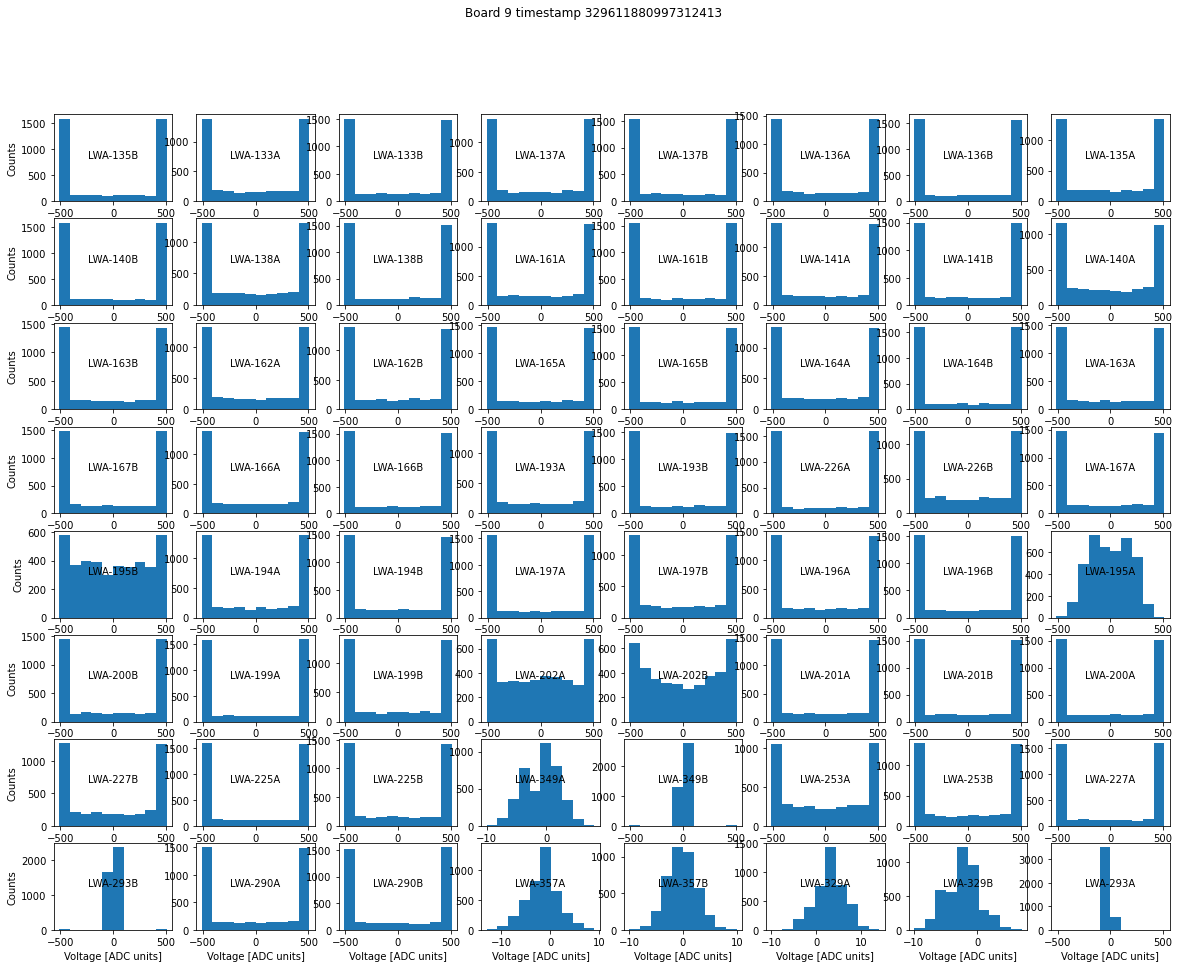

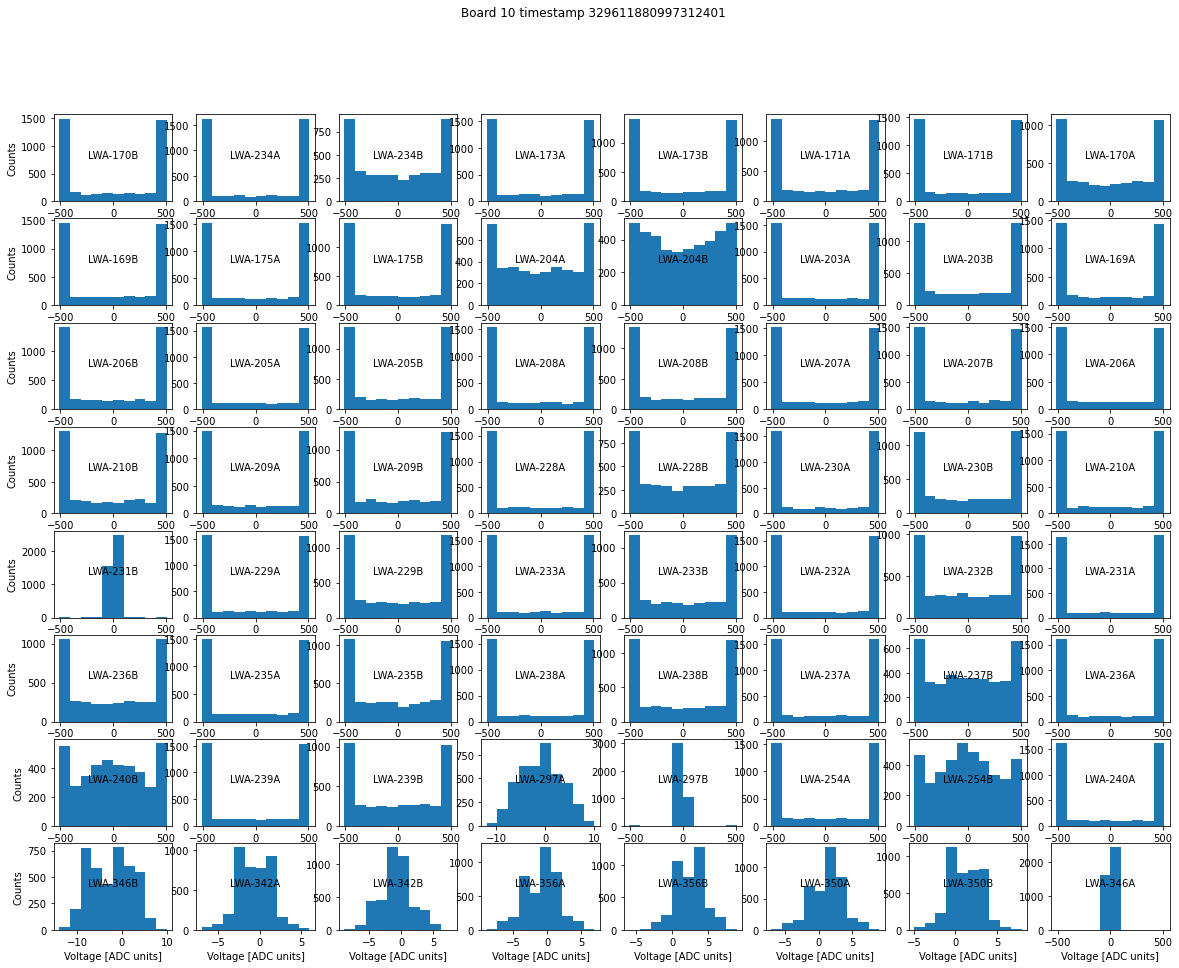

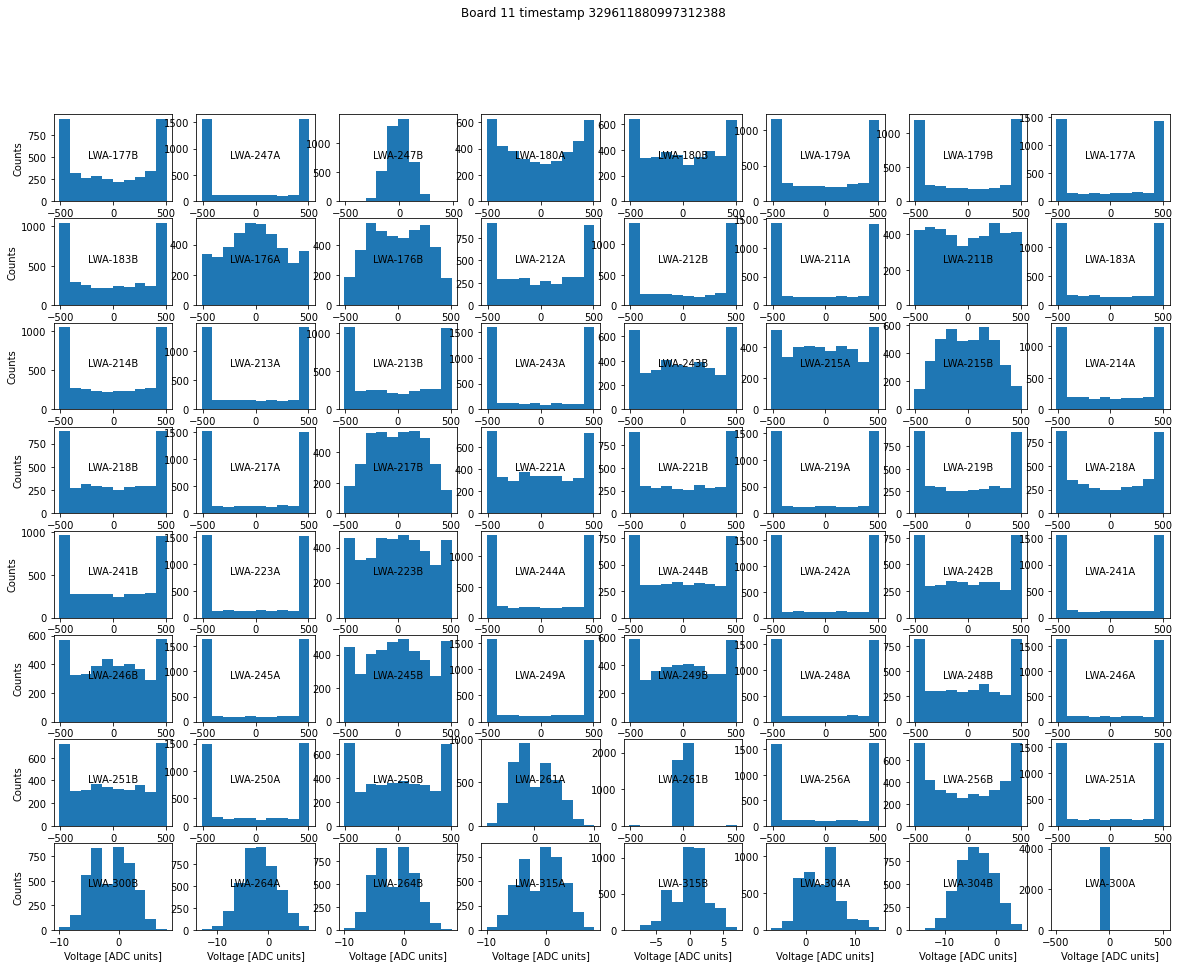

In [79]:
plot_all_histograms(events[0])